In [ ]:
from sklearn.preprocessing import MinMaxScaler # normalizados de dados
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import numpy as np # permite trabalhar com vetores e matrizes
import pandas as pd # permite manipulacao e analise de dados
import matplotlib.pyplot as plt # ferramenta para plotagem
import statsmodels.tsa.arima.model as models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Transformando em série temporal
df = pd.read_csv('/content/dados_isquemicas.csv')
periodo = []
for i in range(0, len(df)):
    periodo.append(str(df['ANO'][i]) + '-' + str(df['MÊS'][i]))
infos = {'PERIODO':periodo, 'CASOS':df['CASOS']}
df = pd.DataFrame(infos, columns=('PERIODO', 'CASOS'))
df['PERIODO'] = pd.to_datetime(df['PERIODO'])
df.index += 1

df.set_index('PERIODO', inplace=True)

In [ ]:
import math


qtde_valores_modelo = math.ceil(len(df) * 0.8)

base_treinamento = df.iloc[0:qtde_valores_modelo].values # intervalo de dados para treinamento
#periodo_treinamento = (df.iloc[0:qtde_valores_modelo, 0:1].values) # intervalo de dados para treinamento

base_teste = df.iloc[qtde_valores_modelo:] # intervalo de dados para teste da rede neural
#periodo_teste = (df.iloc[qtde_valores_modelo:].values)
base_completa = df.iloc[0:, 0:1].values # carrega a base completa
#print(len(base_treinamento), len(base_teste), len(base_completa))

normalizador = MinMaxScaler(feature_range=(0, 1)) # configura o normalizador entre 0 e 1

base_treinamento_normalizada = normalizador.fit_transform(base_treinamento) # faz a normalizacao dos dados

In [ ]:
df.describe()

,CASOS
count,204.000000
mean,46.676471
std,11.500406
min,14.000000
25%,40.000000
50%,46.000000
75%,54.000000
max,75.000000


In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['CASOS'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(casos):
    result=adfuller(casos)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['CASOS'])

ADF Test Statistic : -2.092328949713534
p-value : 0.2476103363002562
#Lags Used : 9
Number of Observations Used : 194
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# Final Thoughts on Autocorrelation and Partial Autocorrelation
* A identificação de um AR model é frequentemente melhor feita com o PACF.

  * Para um modelo AR, o PACF teórico “desliga” além da ordem do modelo. A frase “desliga” significa que, em teoria, as autocorrelações parciais são iguais a 0 além desse ponto. Dito de outra forma, o número de autocorrelações parciais diferentes de zero fornece a ordem do modelo AR. Por “ordem do modelo” queremos dizer a defasagem mais extrema de x que é usada como preditor.

* Indentificação de um MA model é freqneuentemente melhor feita com um ACF do que com um PACF.

  * Para um modelo MA, o PACF teórico não é desligado, mas diminui de alguma maneira em direção a 0. Um padrão mais claro para um modelo MA está no ACF. O ACF terá autocorrelações diferentes de zero apenas nas defasagens envolvidas no modelo.

(p,d,q)
- p: AR (AutoRegressão) model lags
- d: differencing
- q: MA (média móvel) lags

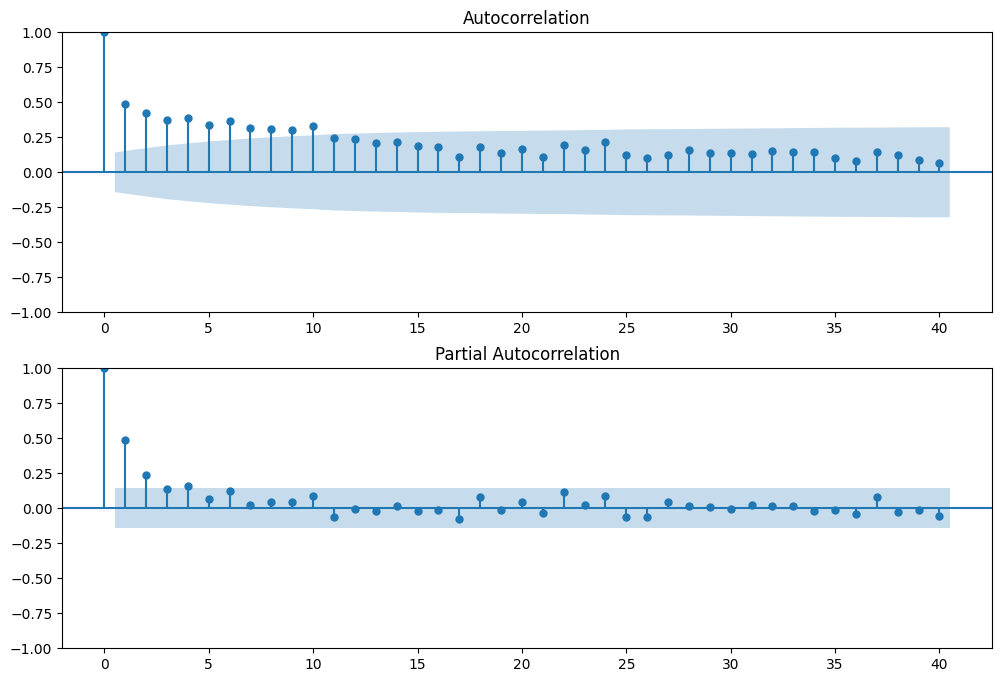

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['CASOS'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig2 = plot_pacf(df['CASOS'].iloc[13:],lags=40,ax=ax2)
plt.savefig(f'/content/autocorrelation&partial.png', format = 'png', bbox_inches='tight')

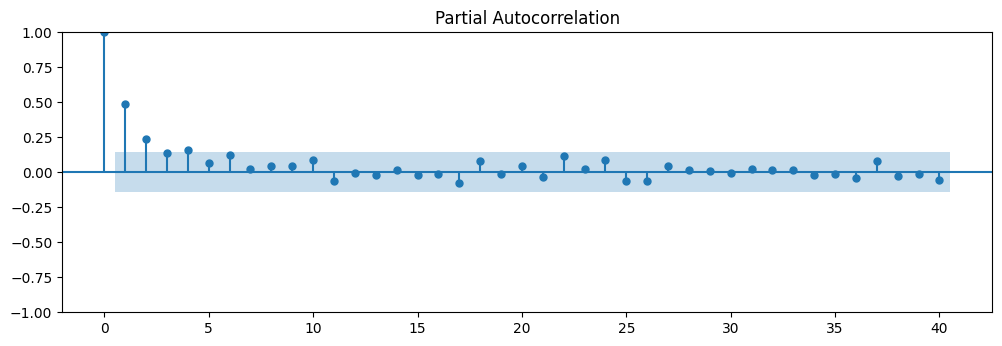

In [ ]:
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(211)
fig2 = plot_pacf(df['CASOS'].iloc[13:],lags=40,ax=ax2)
plt.savefig(f'/content/partial_autocorrelation.png', format = 'png', bbox_inches='tight')

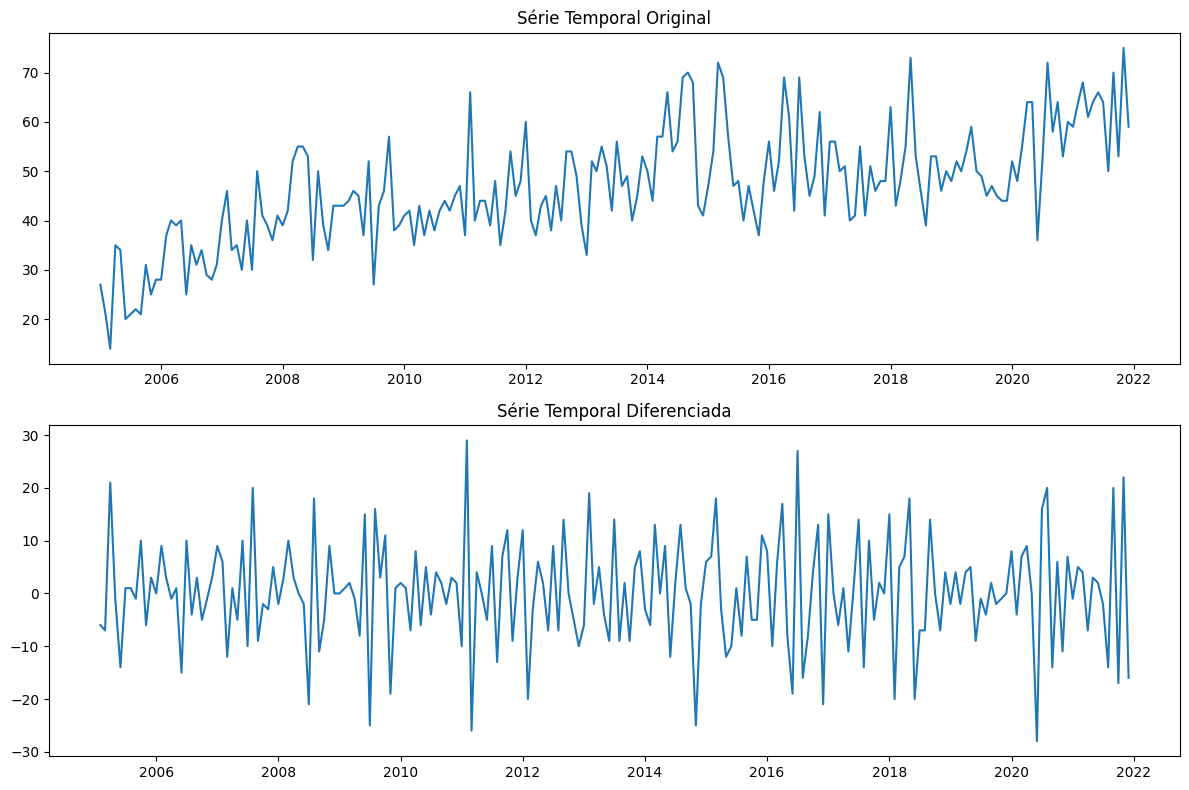

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(df['CASOS'], label='Série Temporal Original')
plt.title('Série Temporal Original')

# Plot da série temporal diferenciada
plt.subplot(2, 1, 2)
plt.plot(df['CASOS'].diff().dropna(), label='Série Temporal Diferenciada')
plt.title('Série Temporal Diferenciada')

# Exiba os gráficos
plt.tight_layout()
plt.show()

In [ ]:
test = base_completa[len(base_completa) - len(base_teste):]
test = list(test)
print(len(test))
print(len(tts))

40
40


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

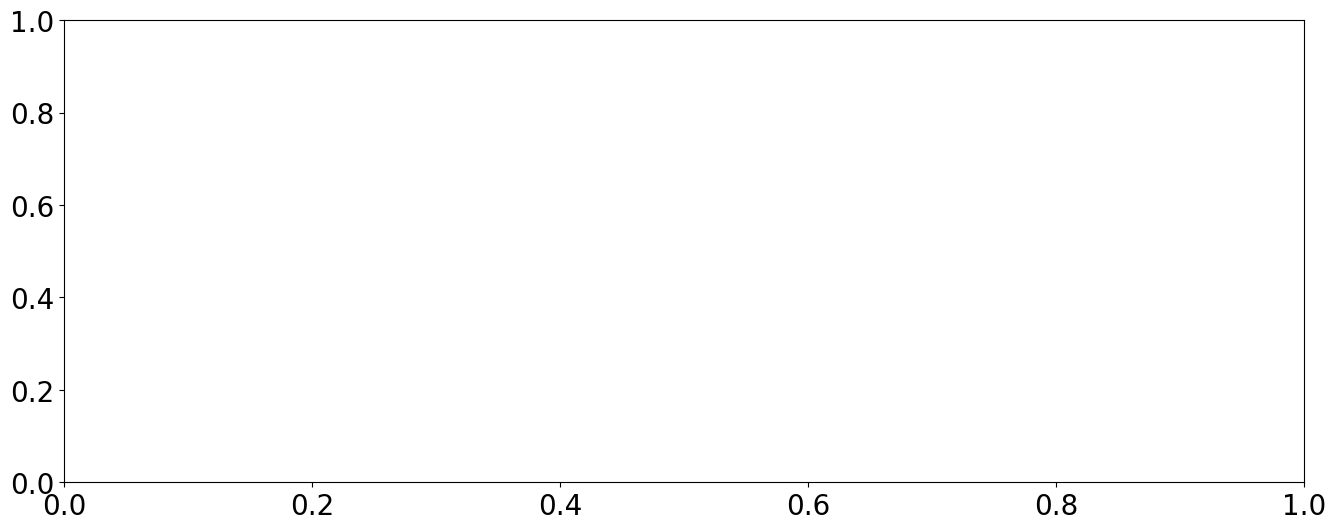

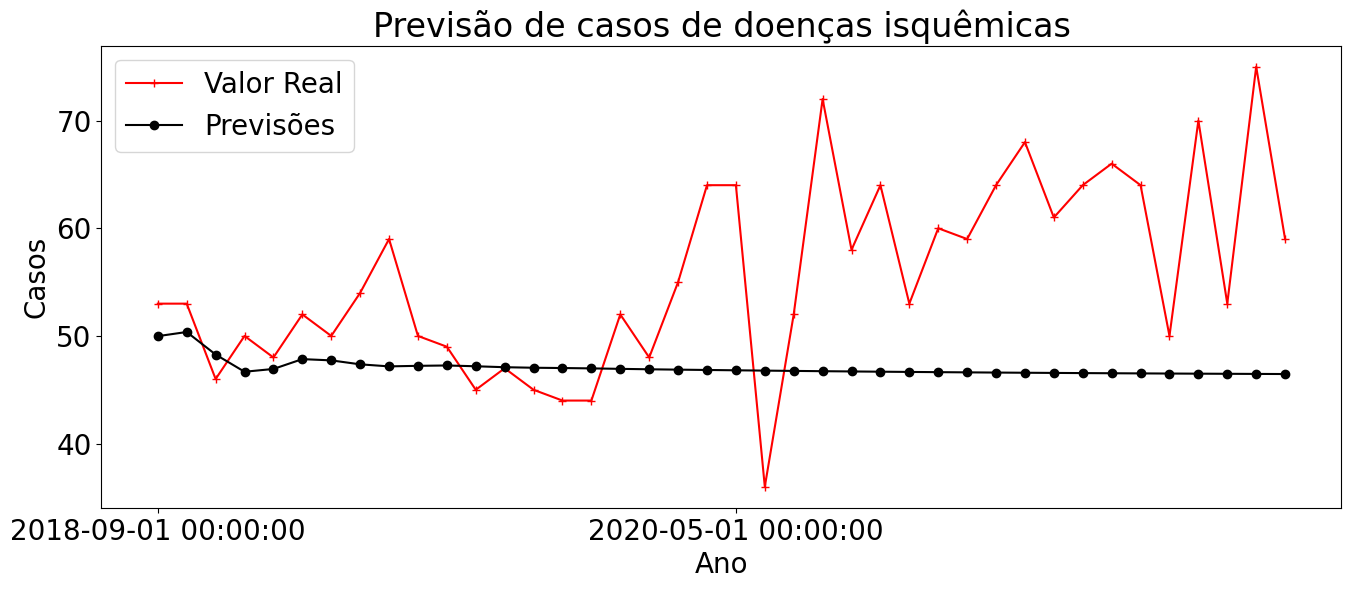

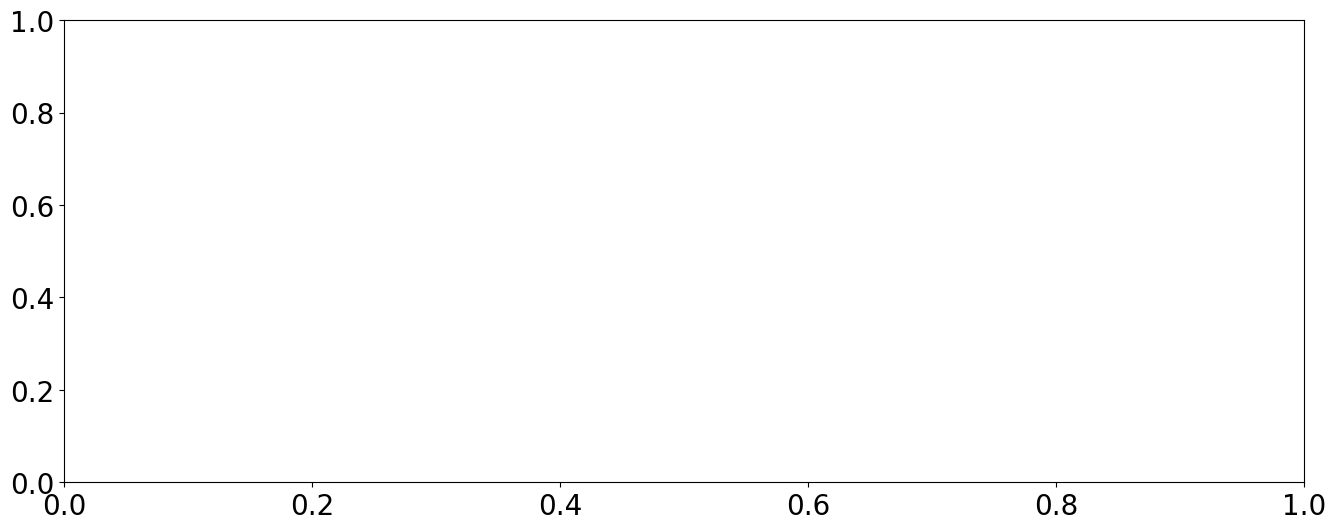

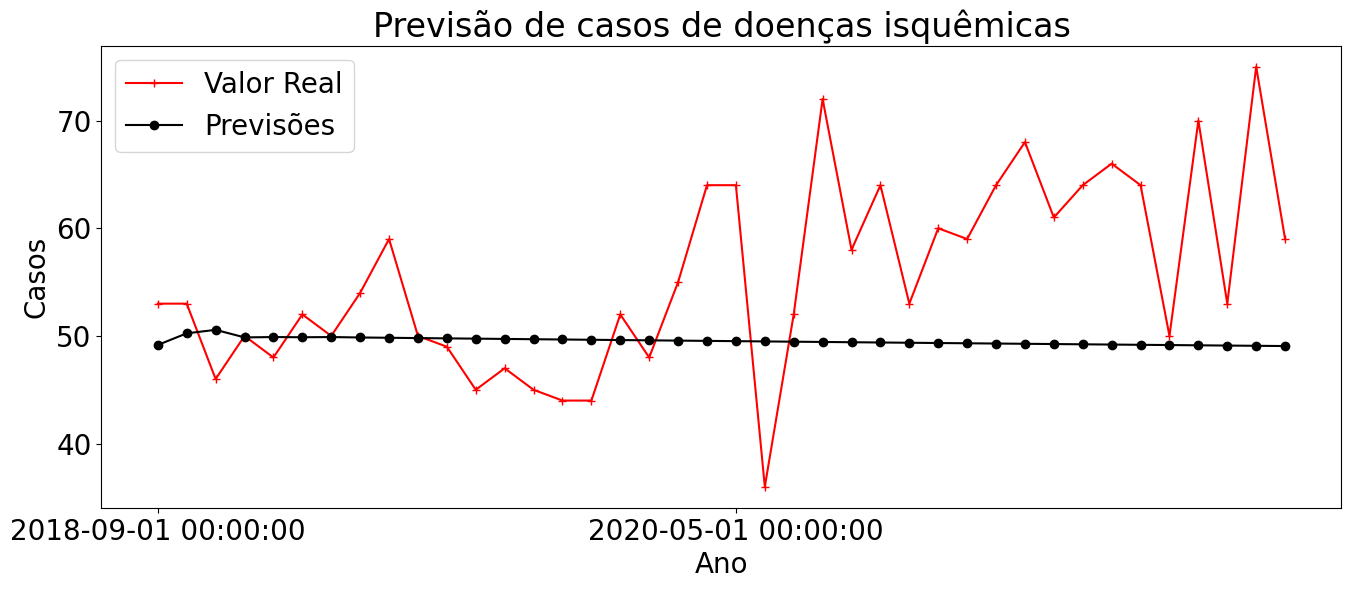

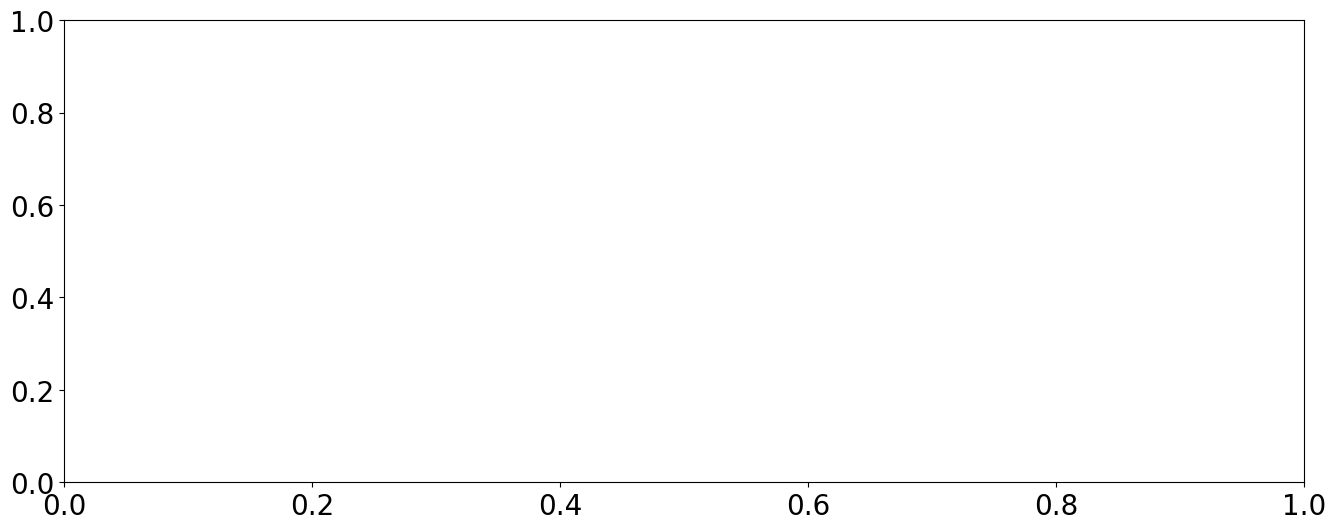

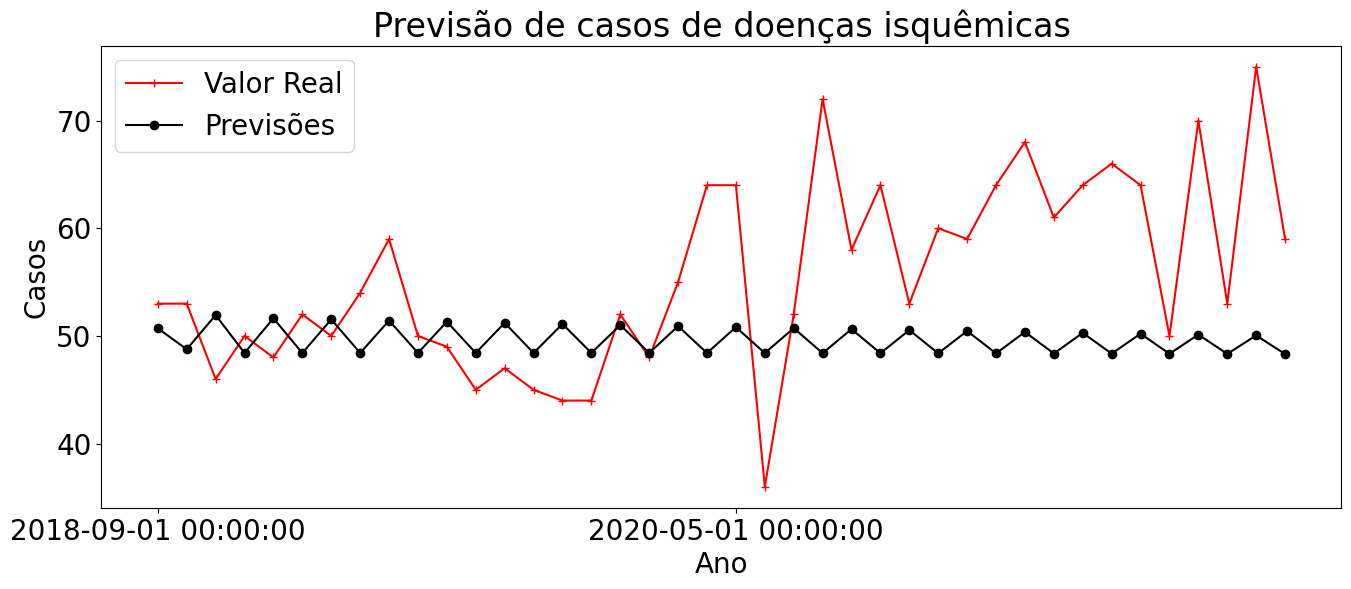

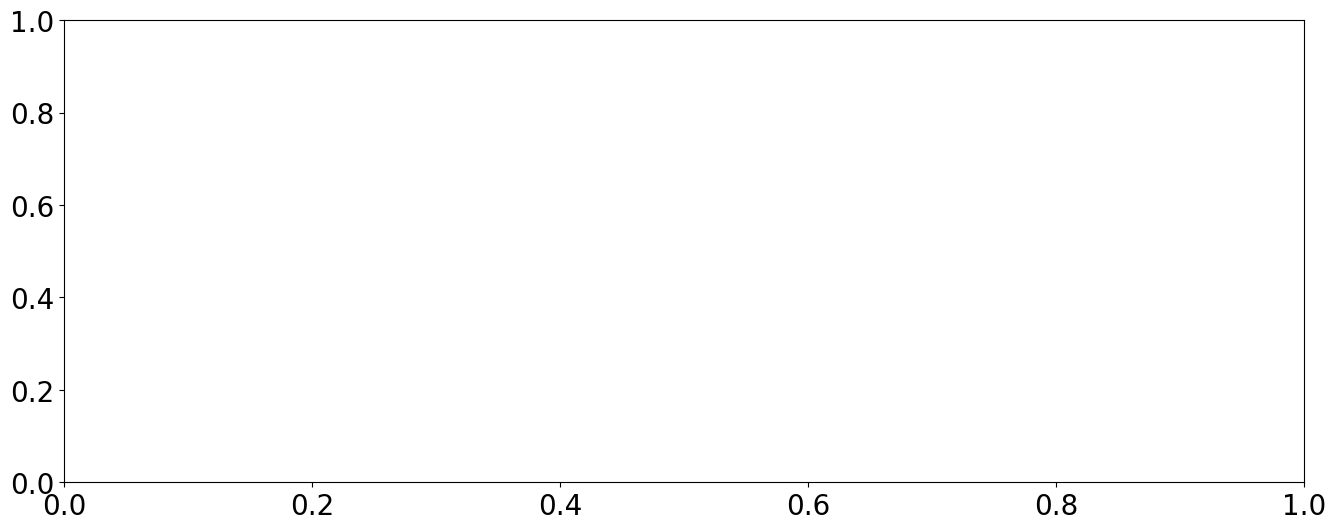

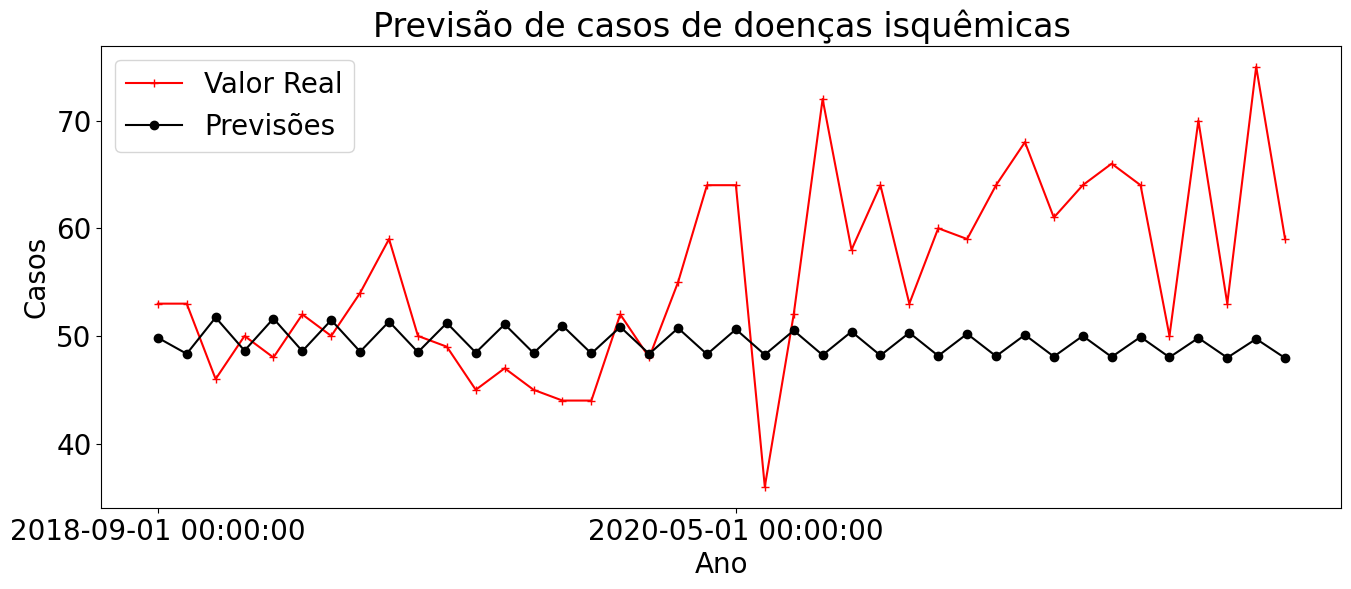

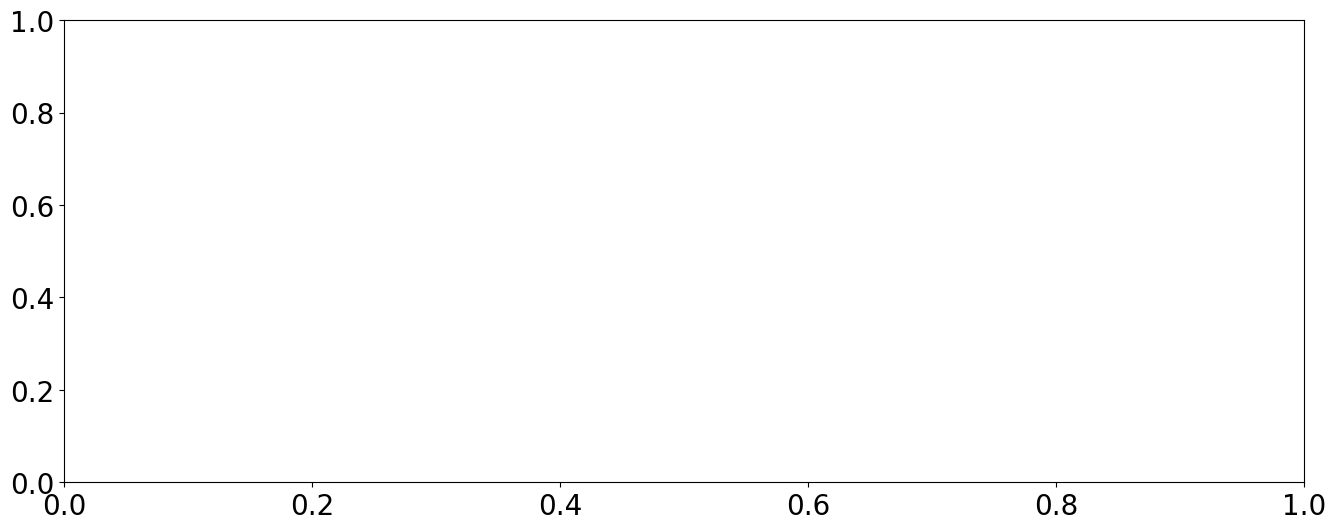

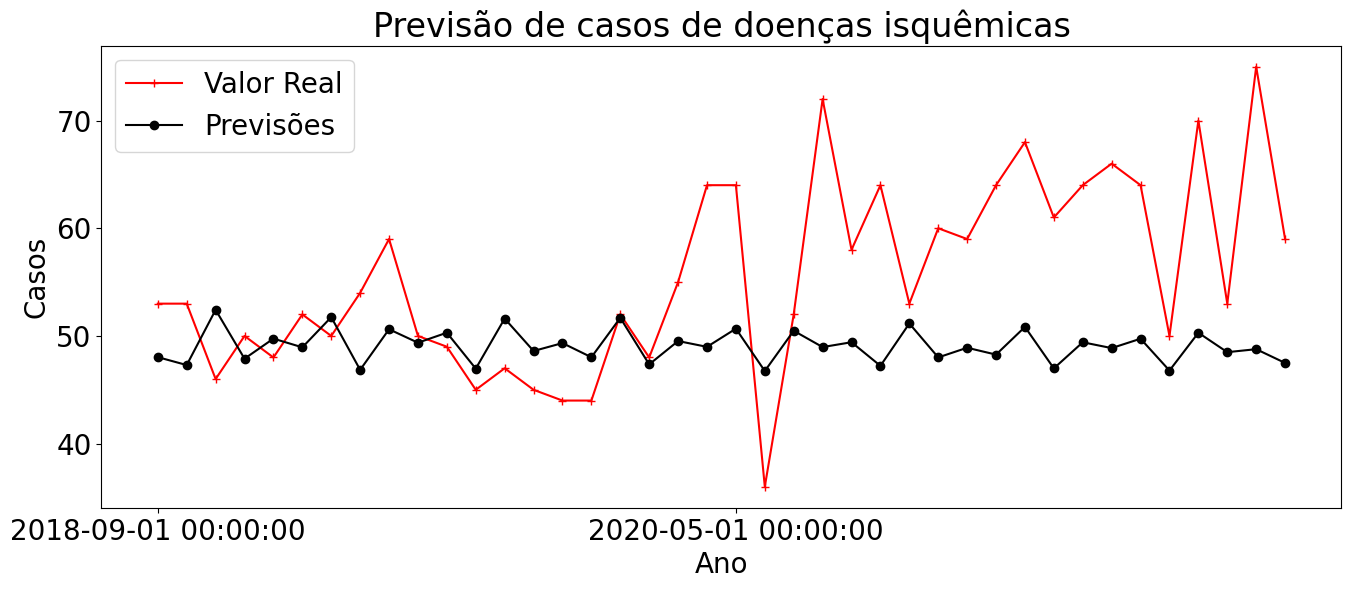

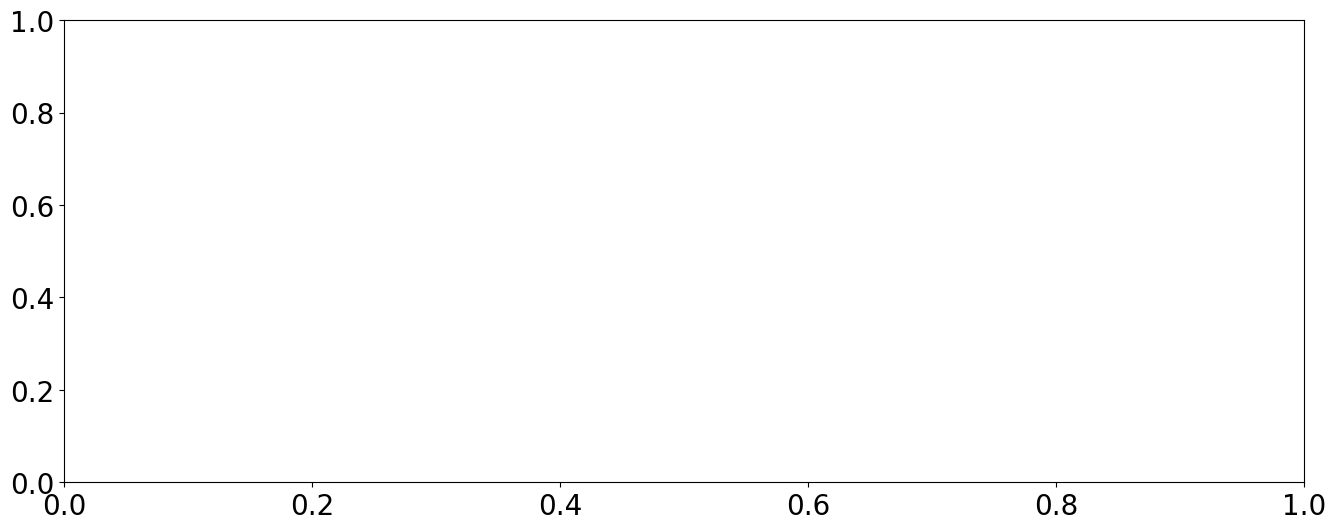

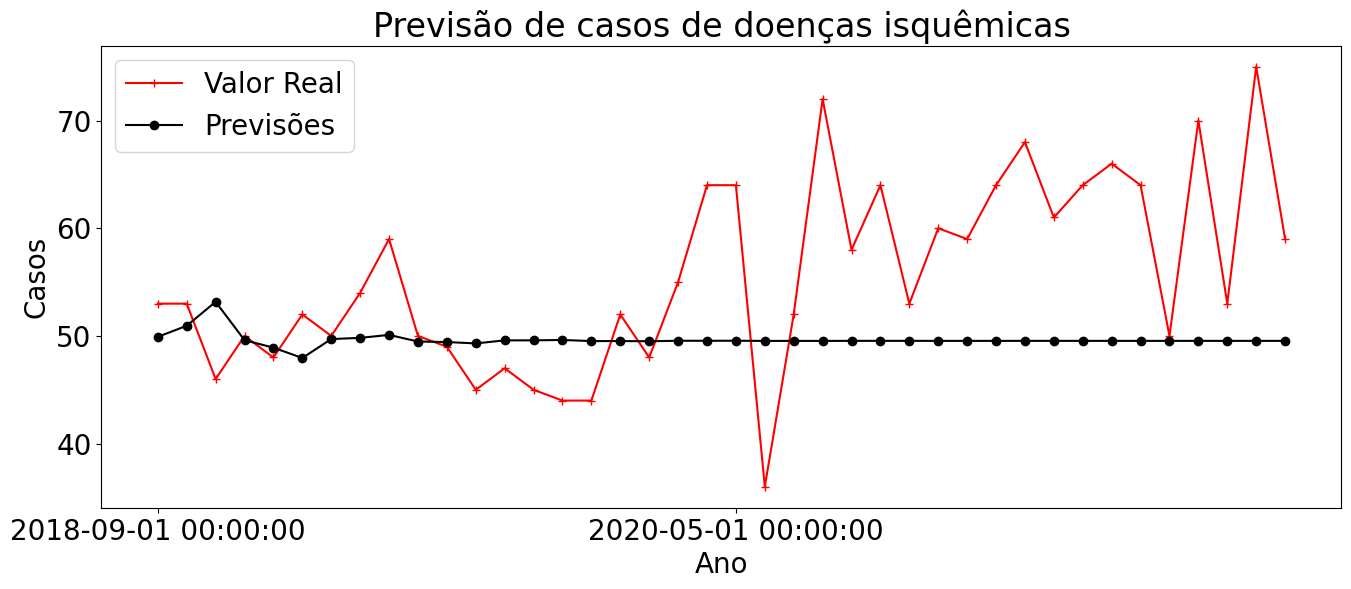

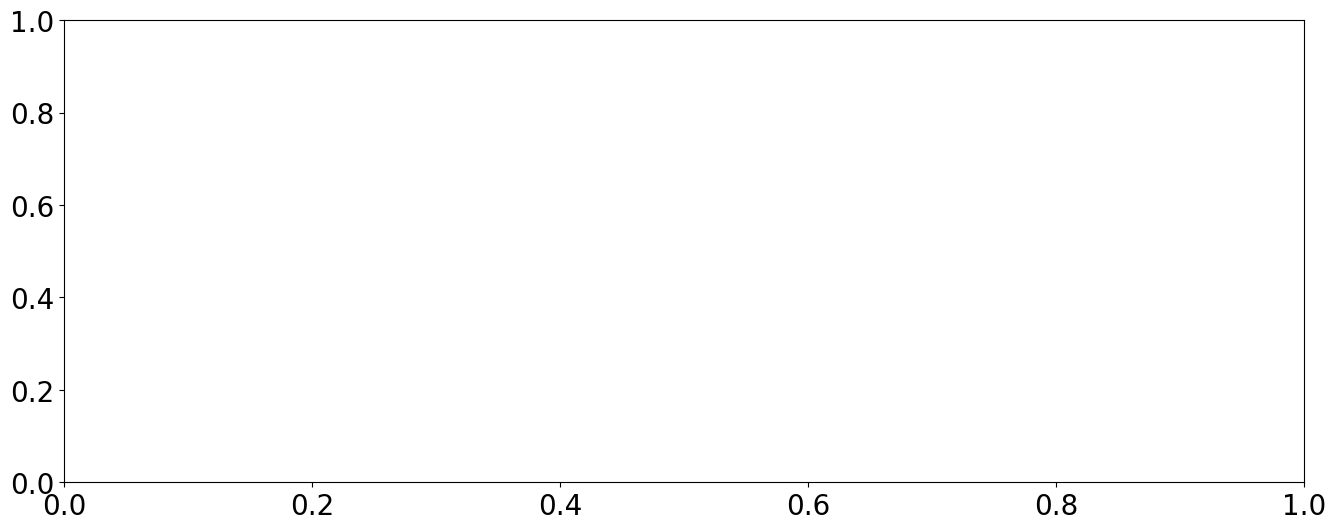

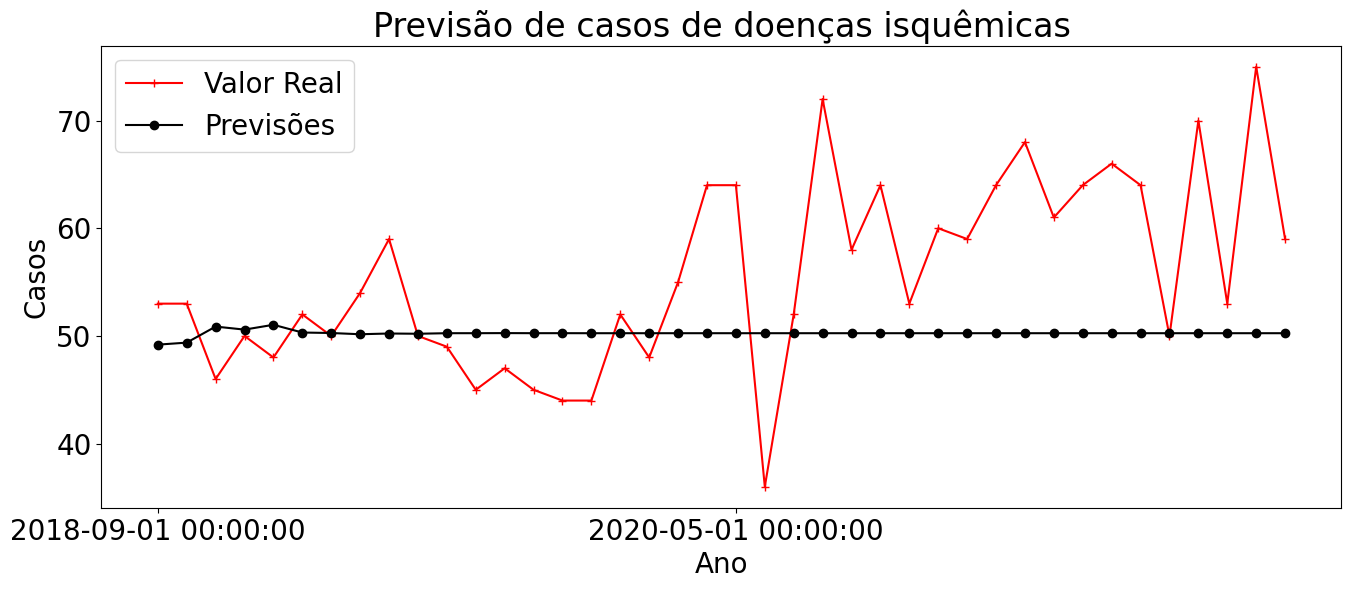

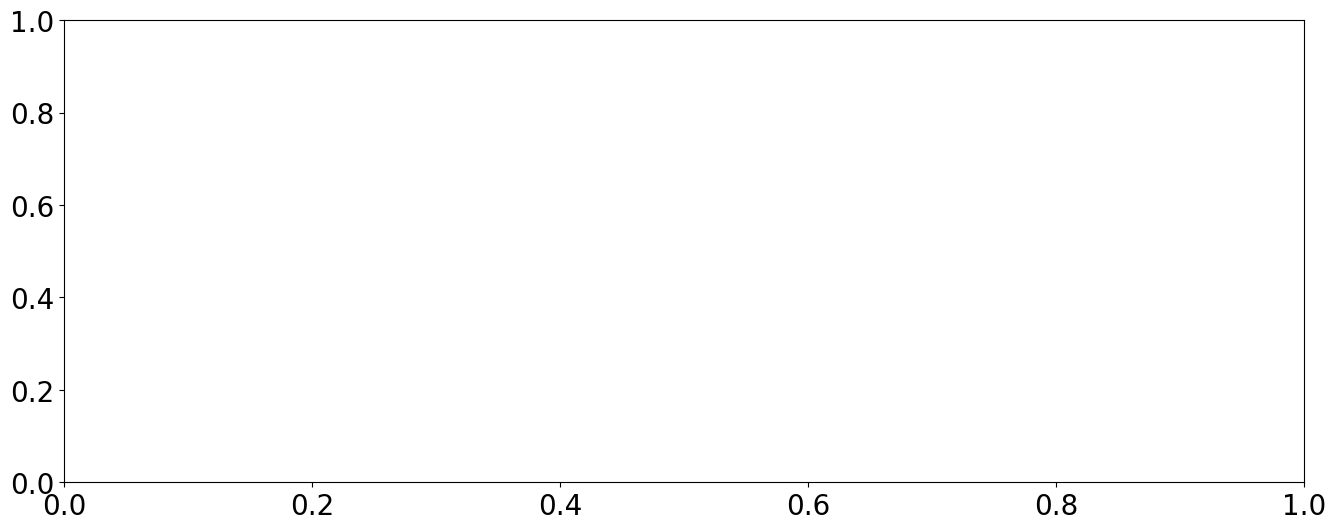

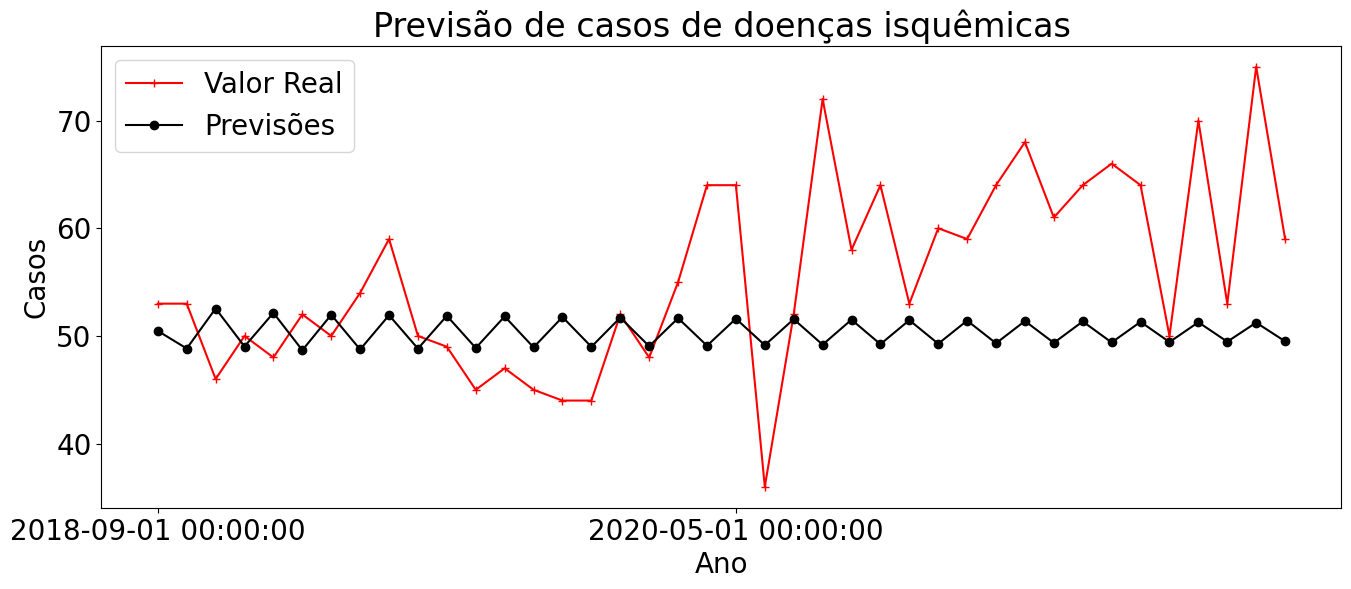

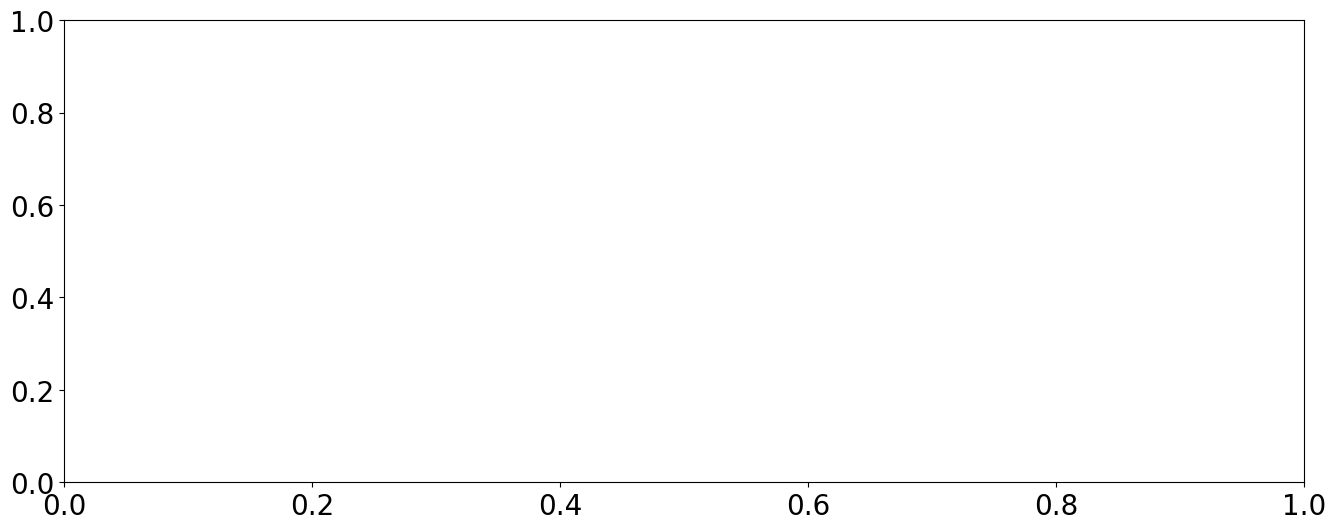

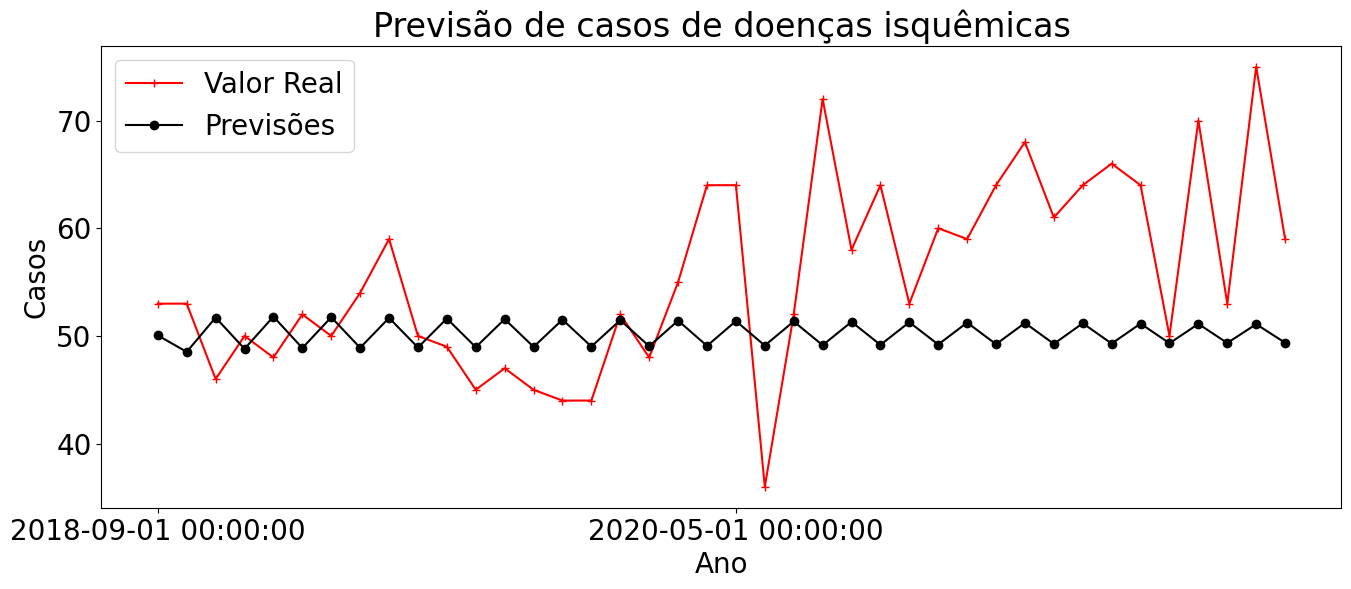

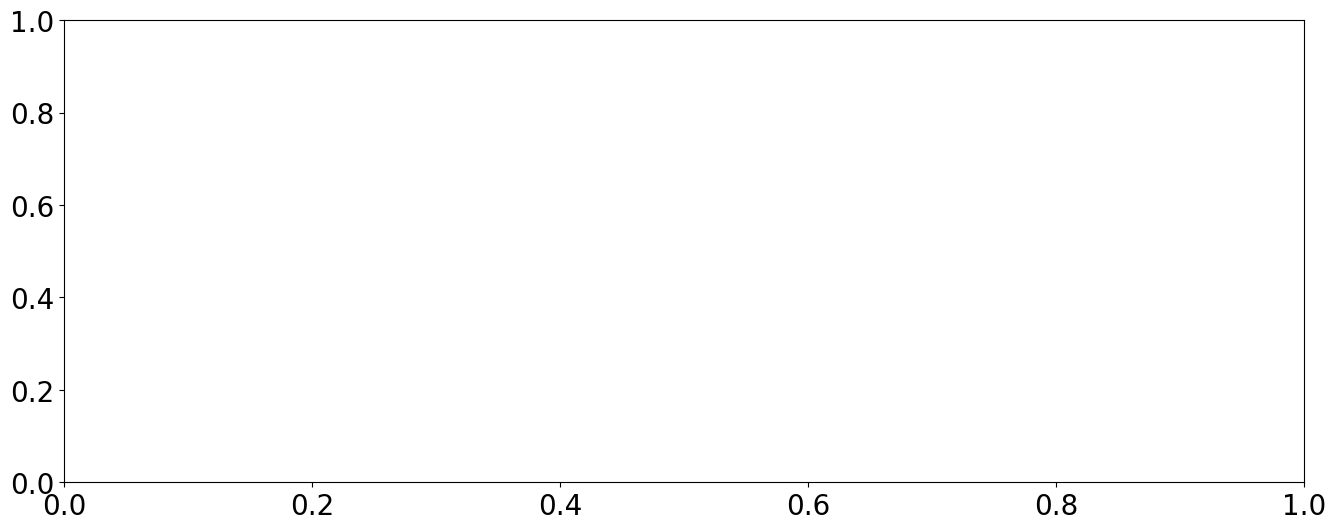

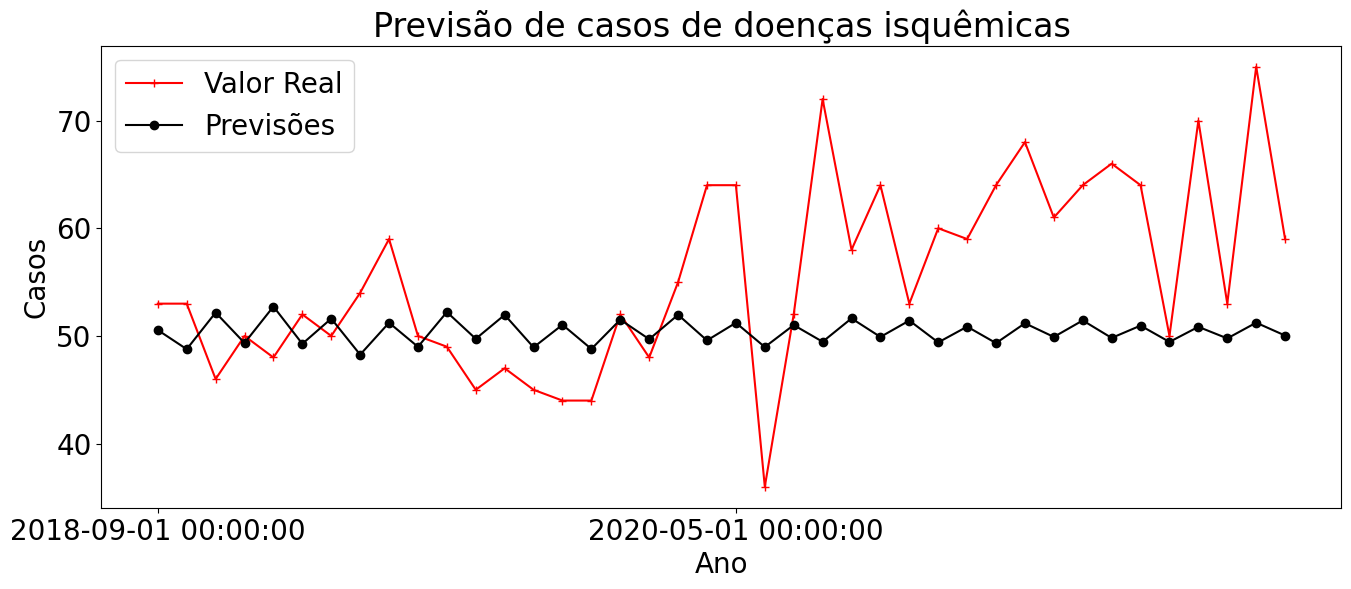

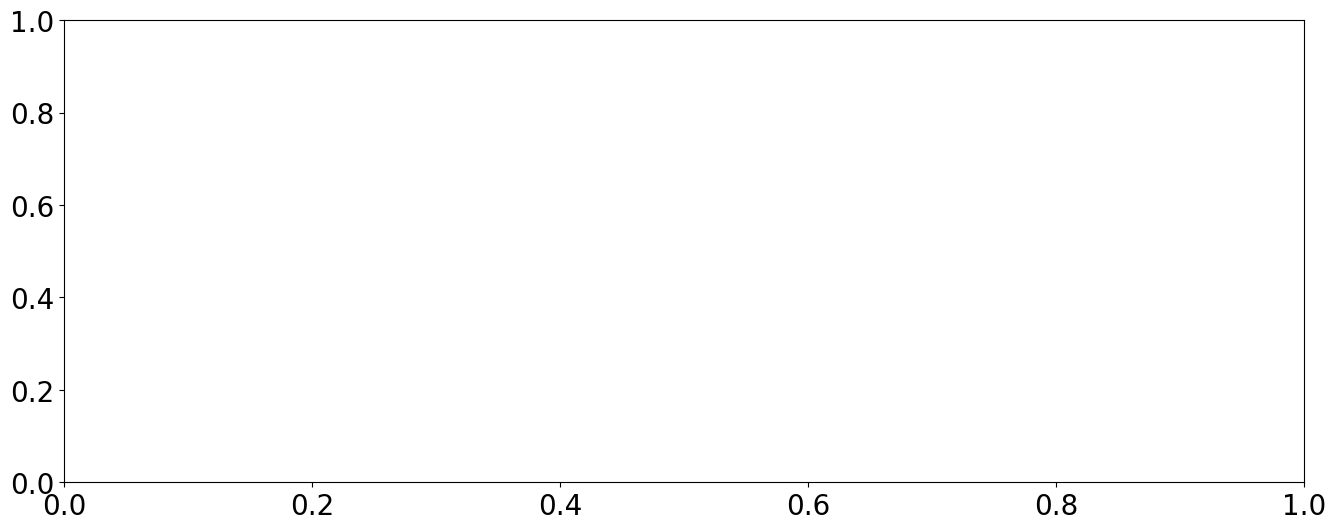

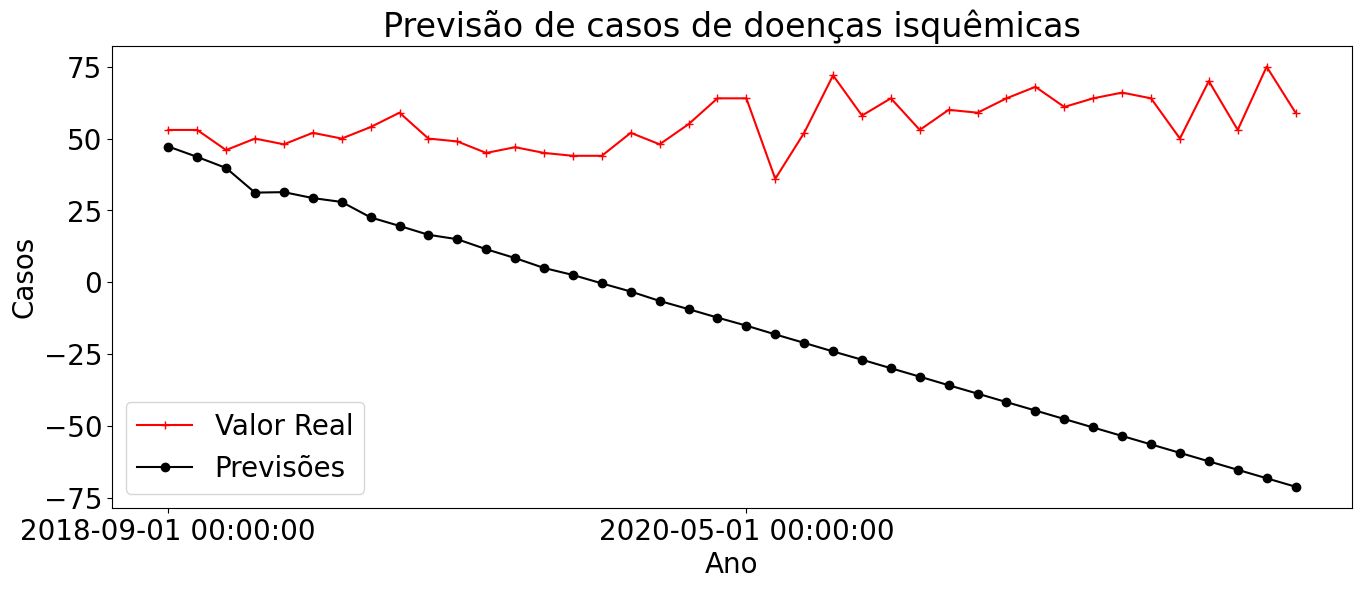

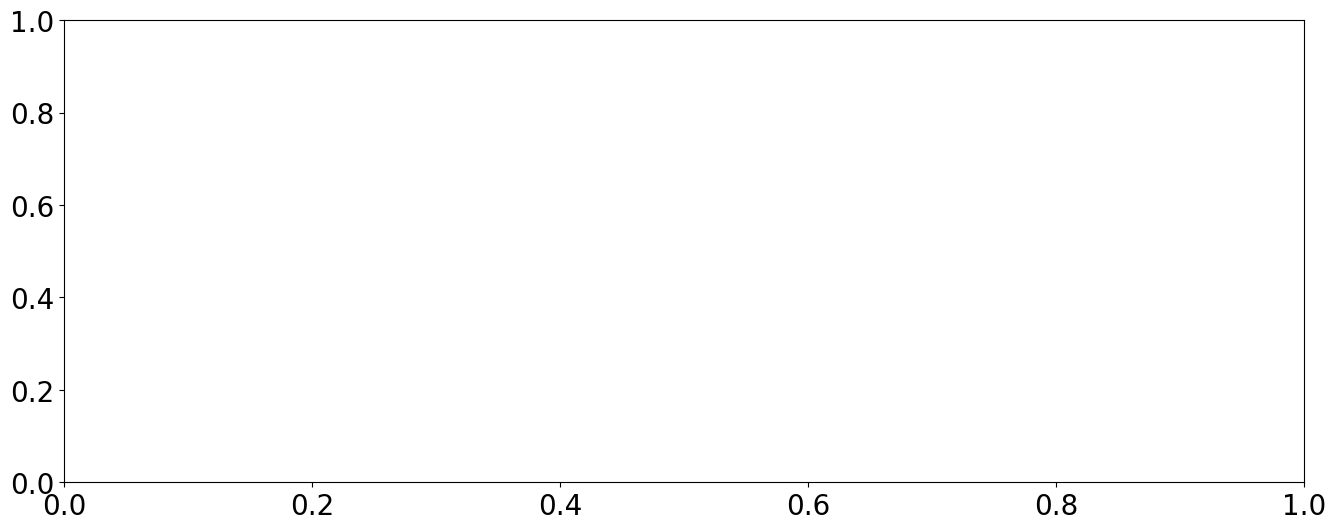

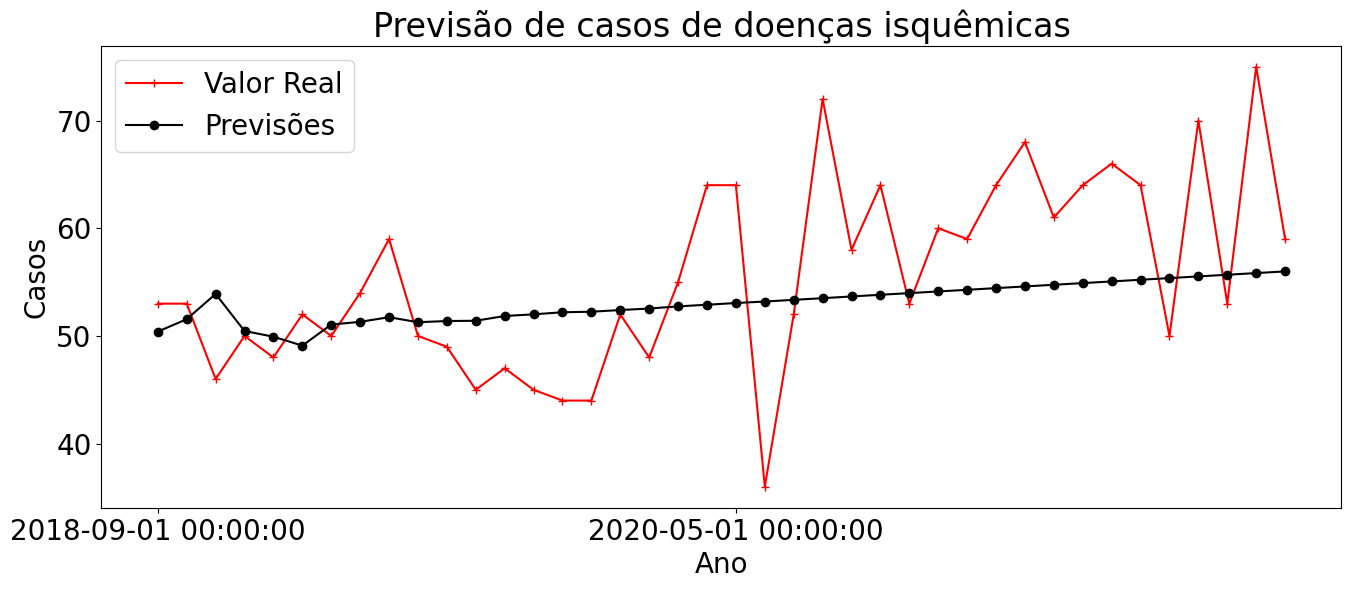

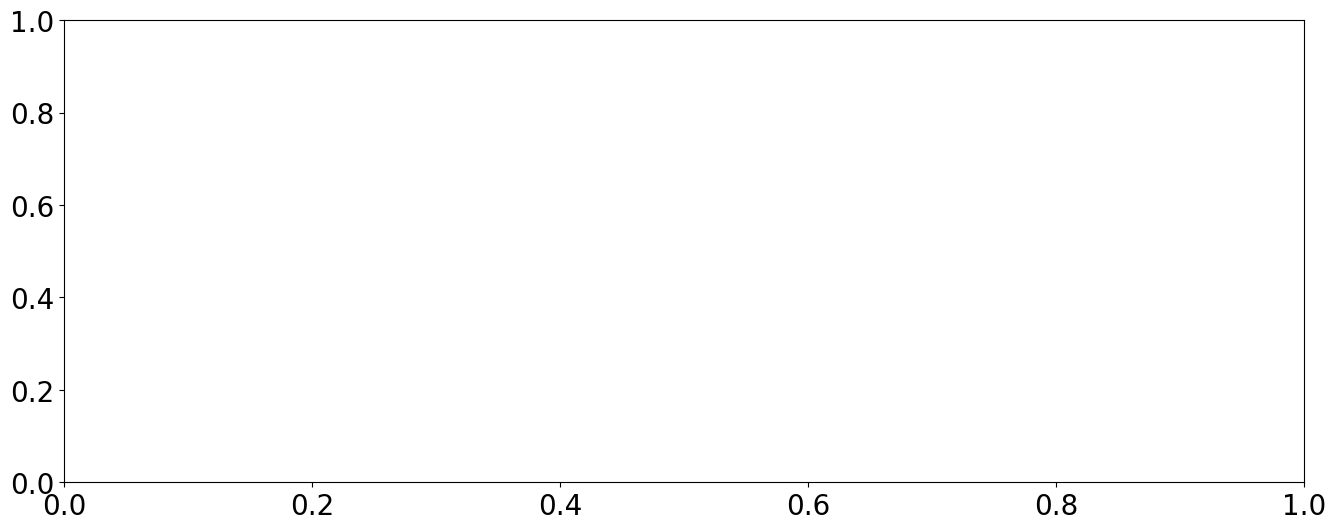

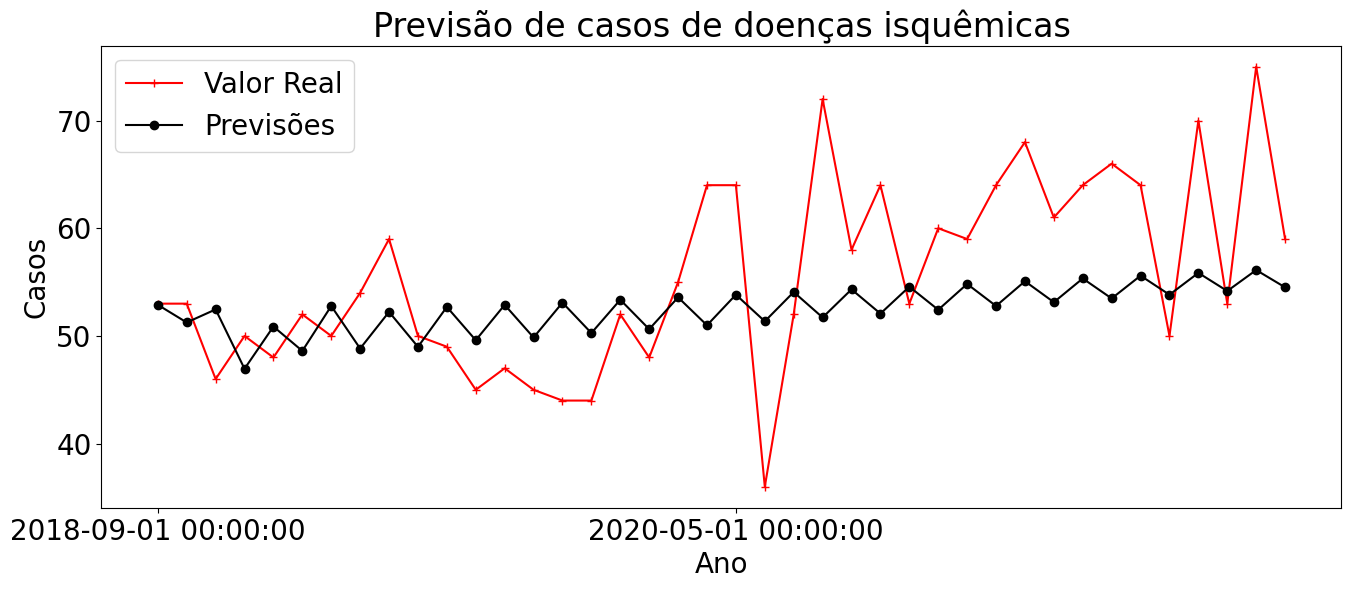

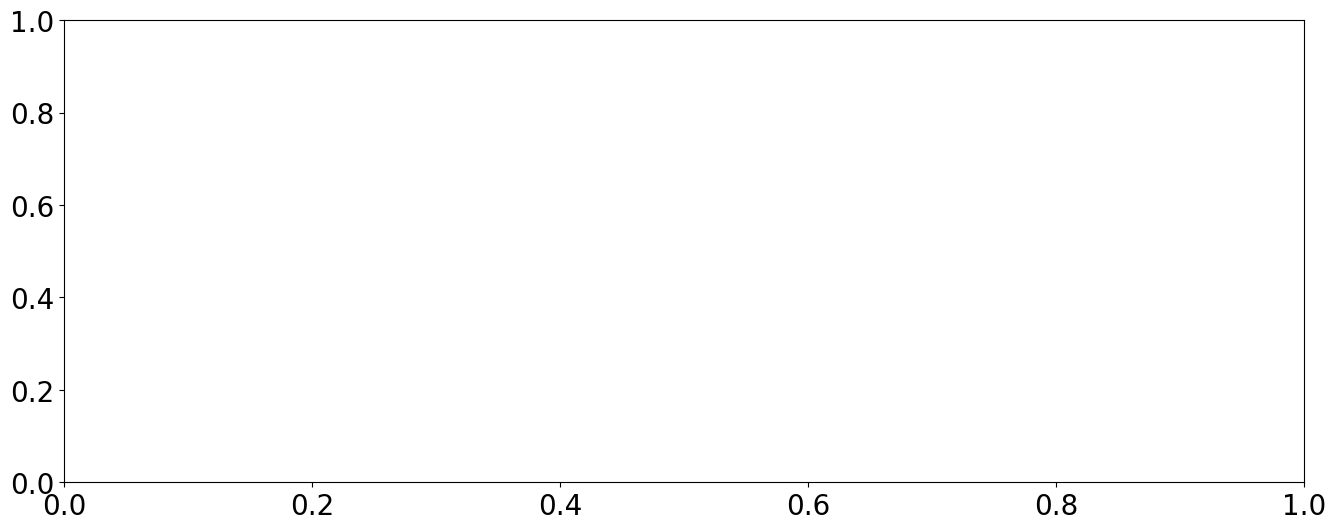

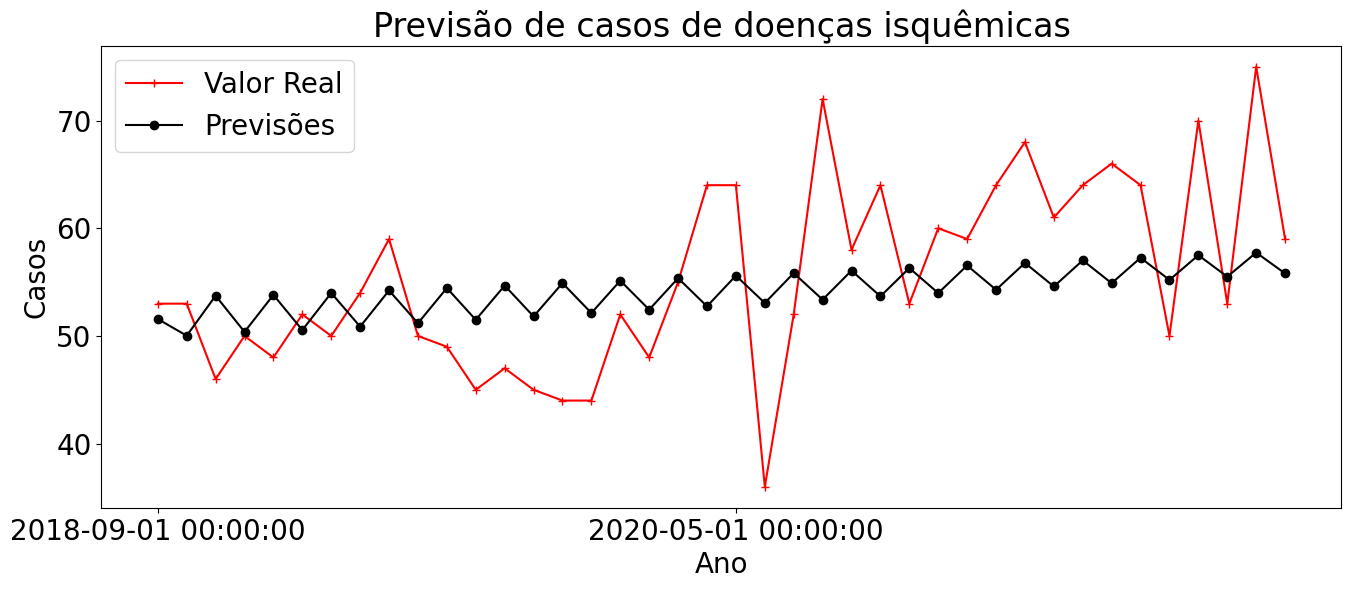

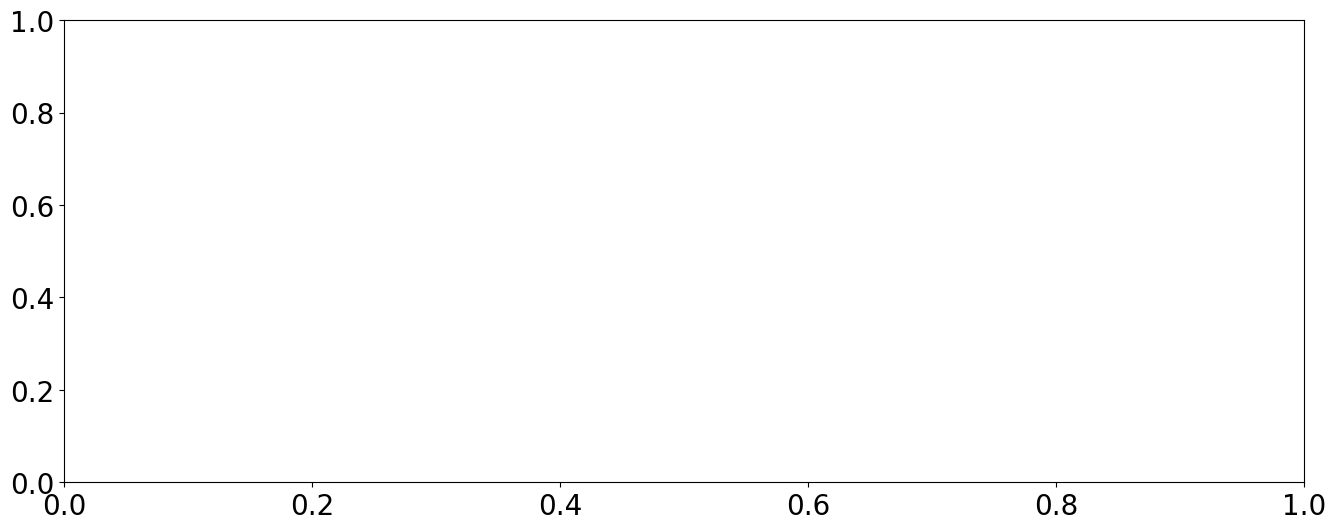

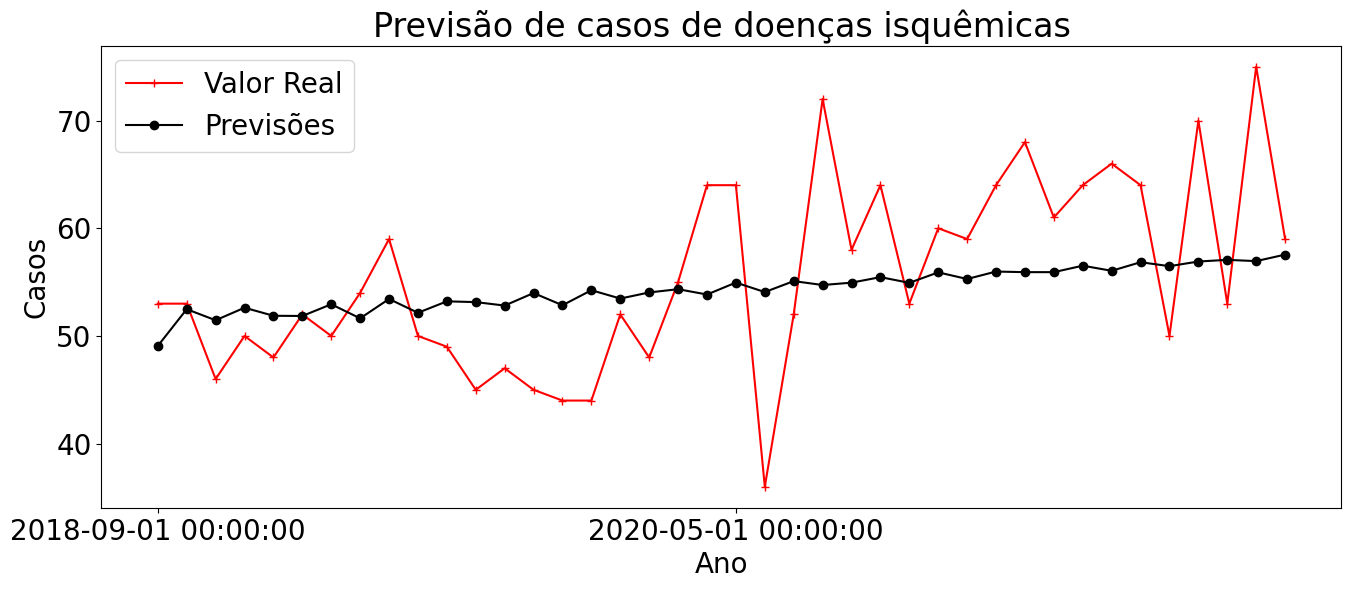

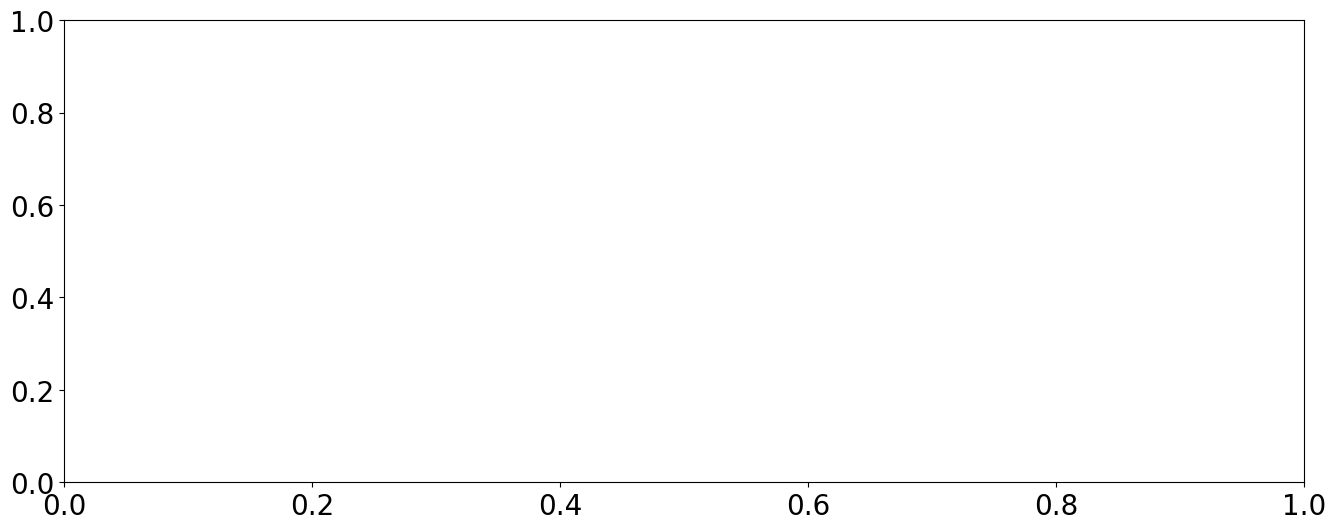

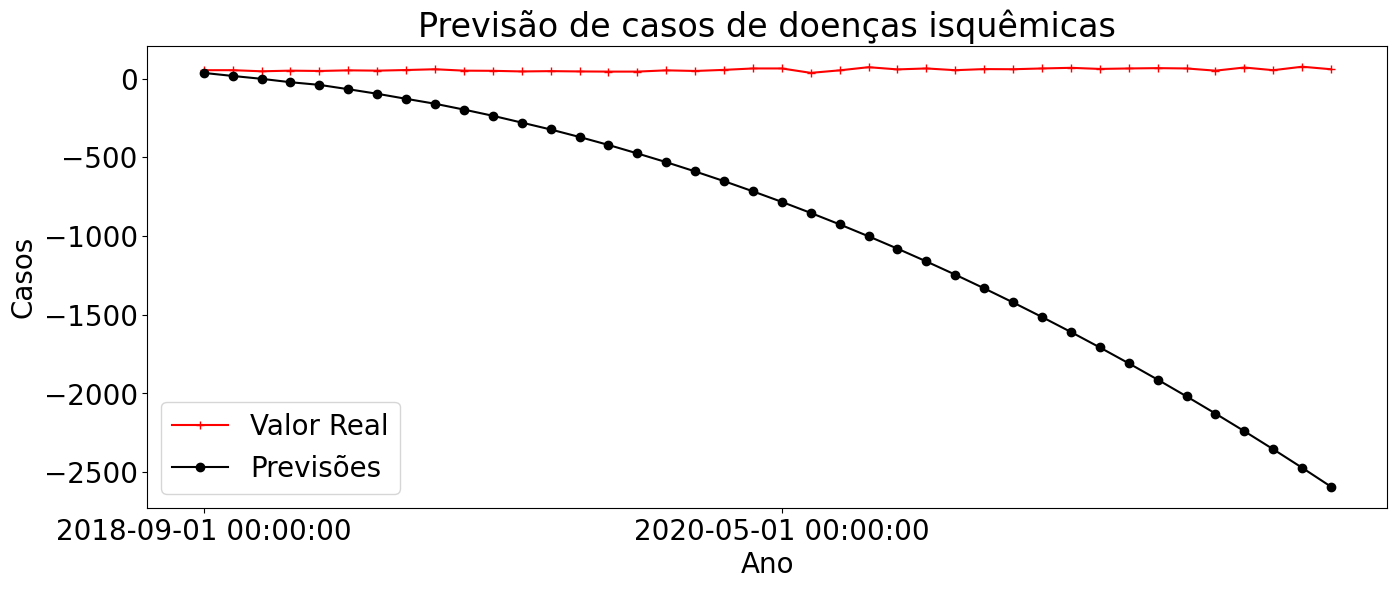

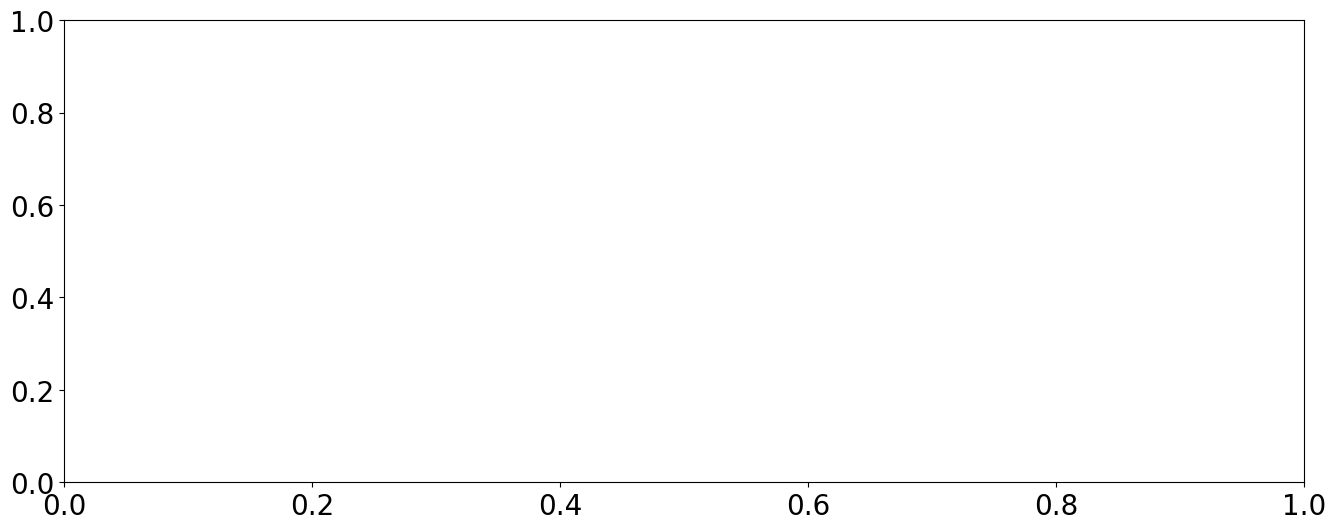

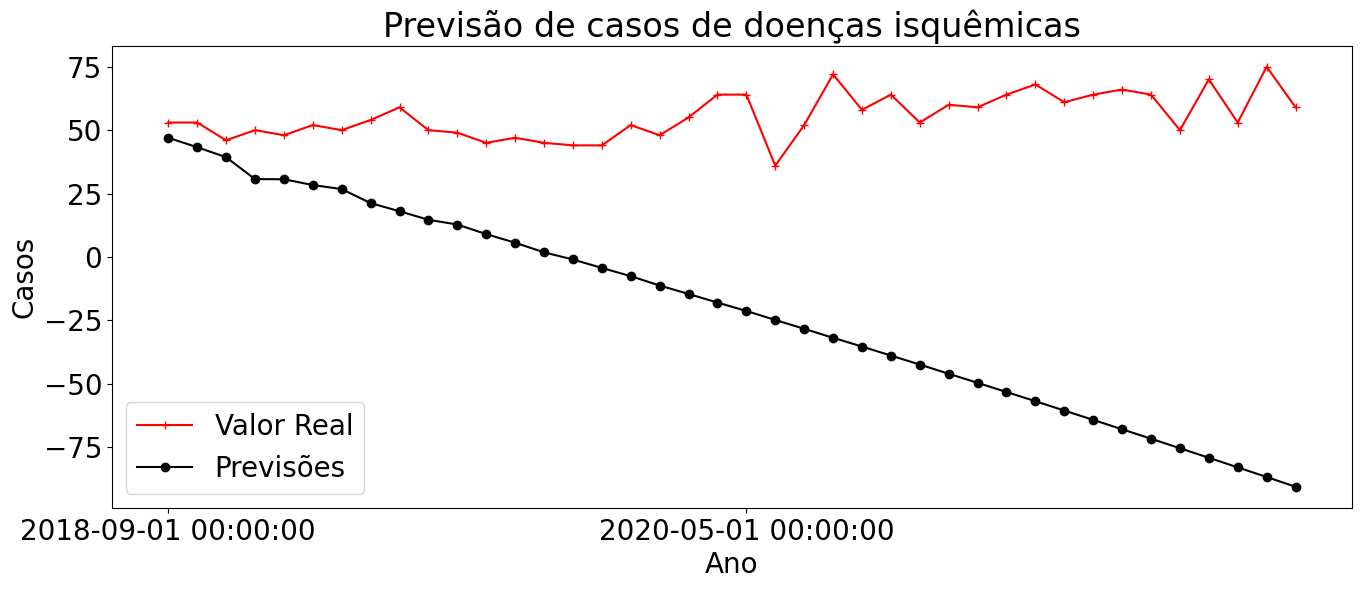

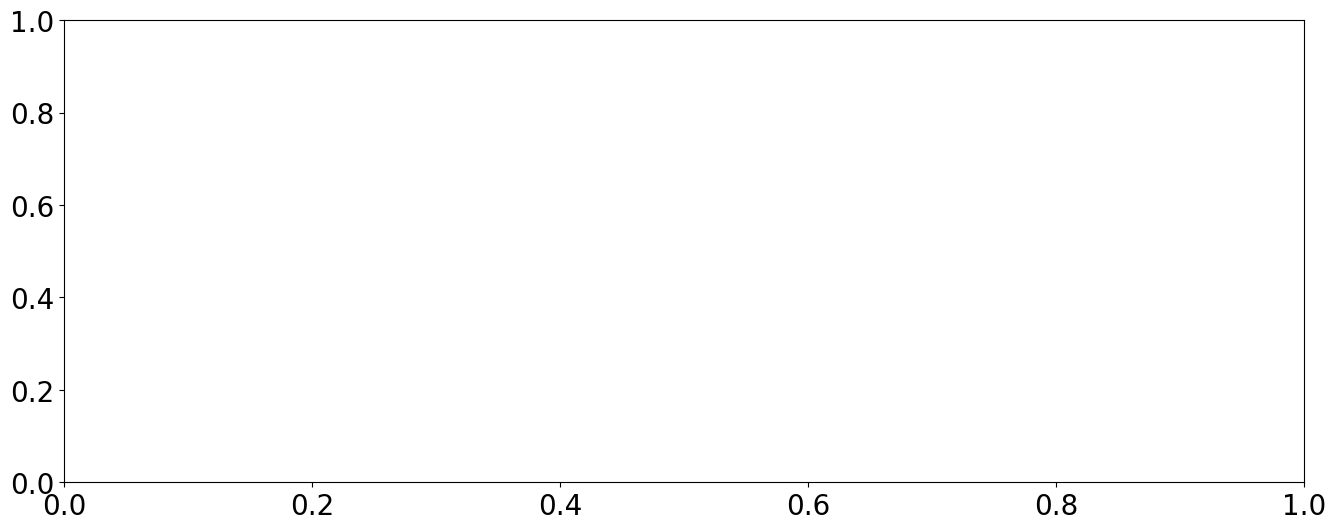

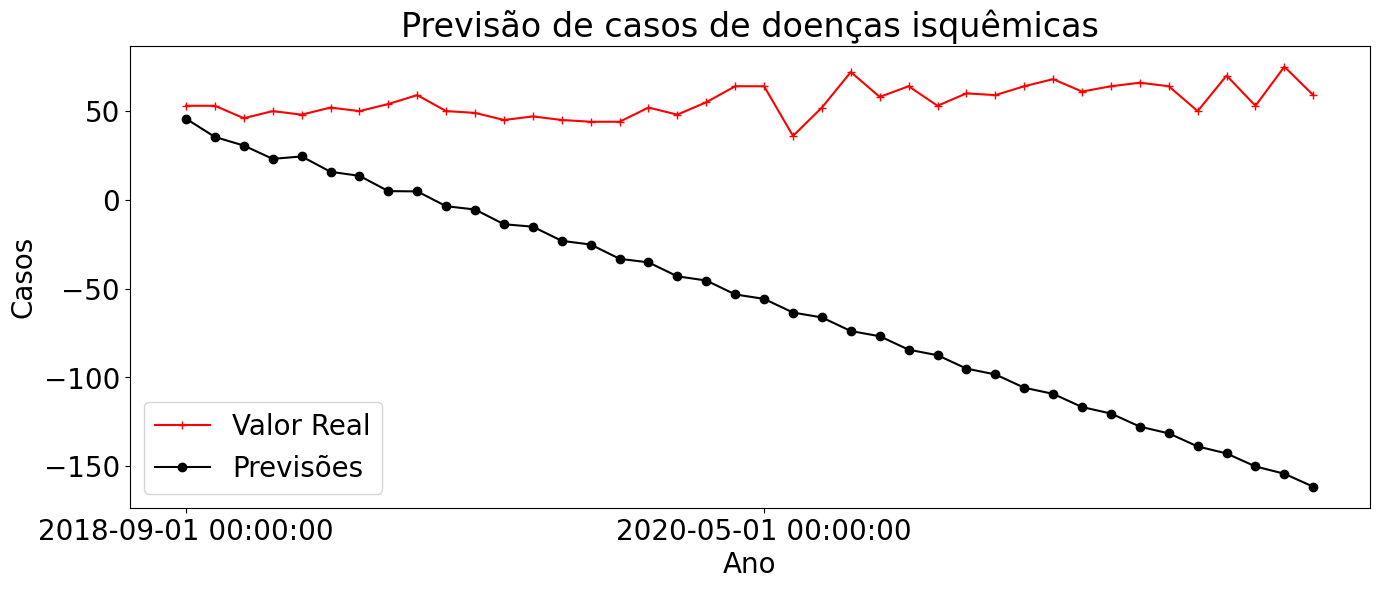

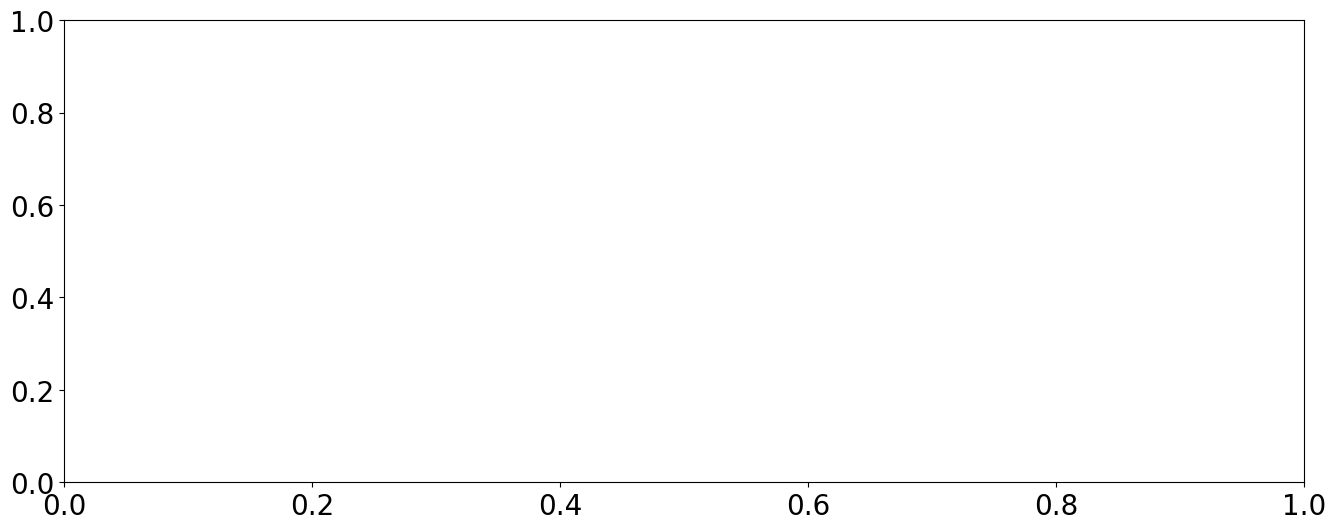

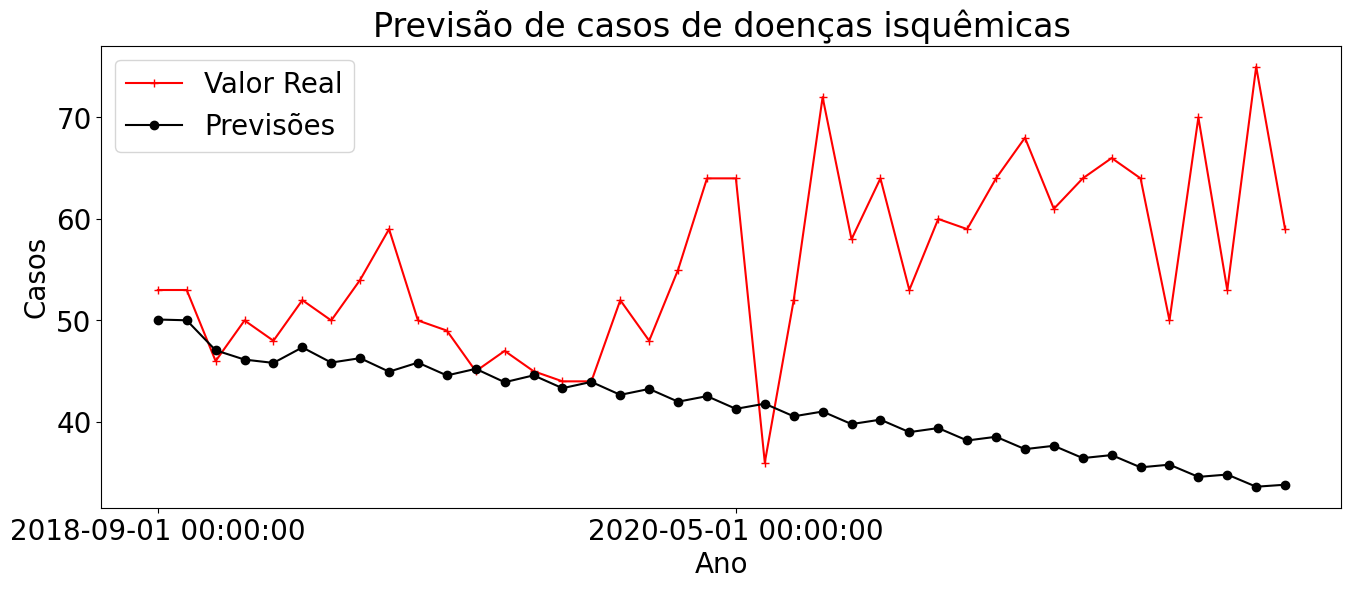

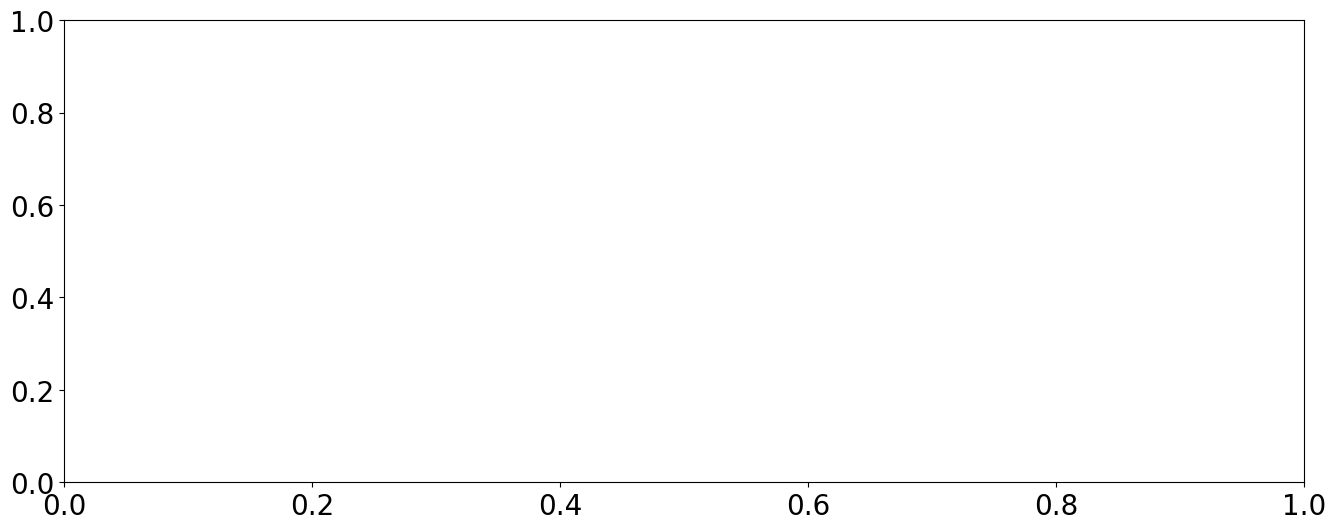

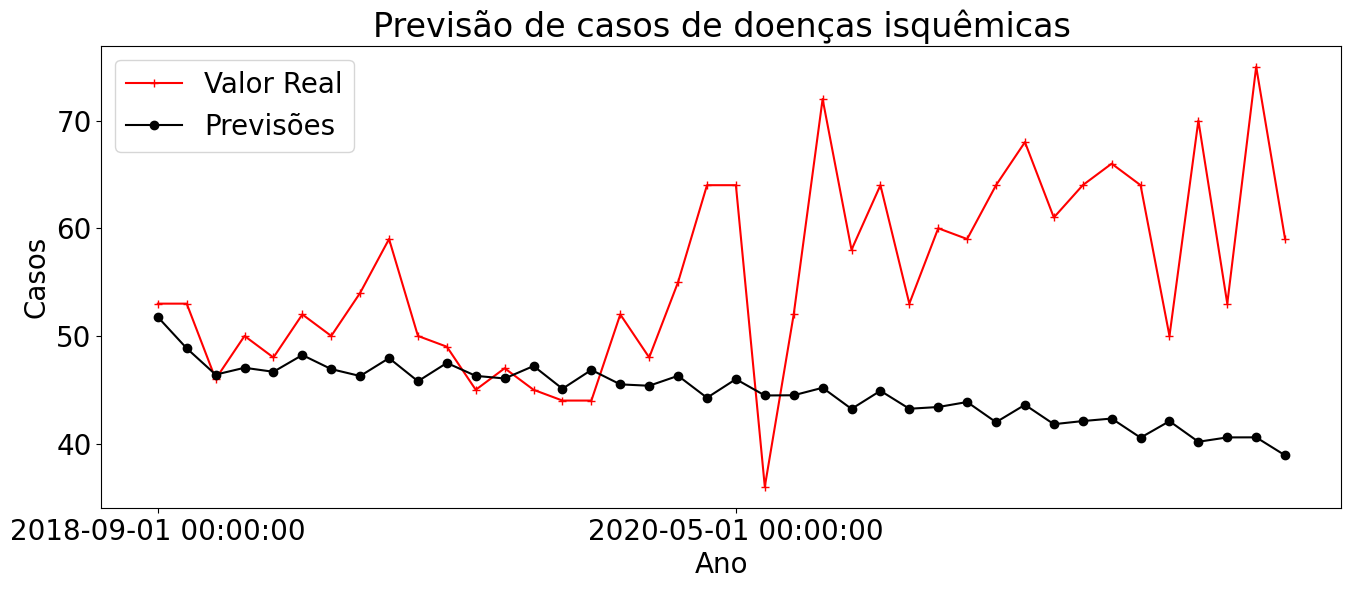

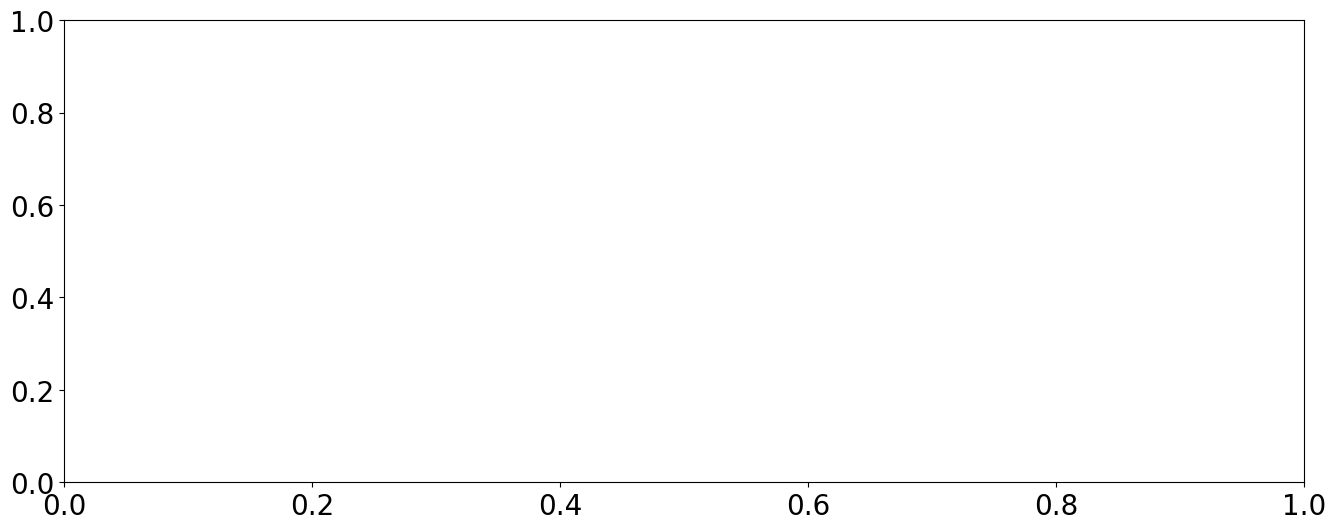

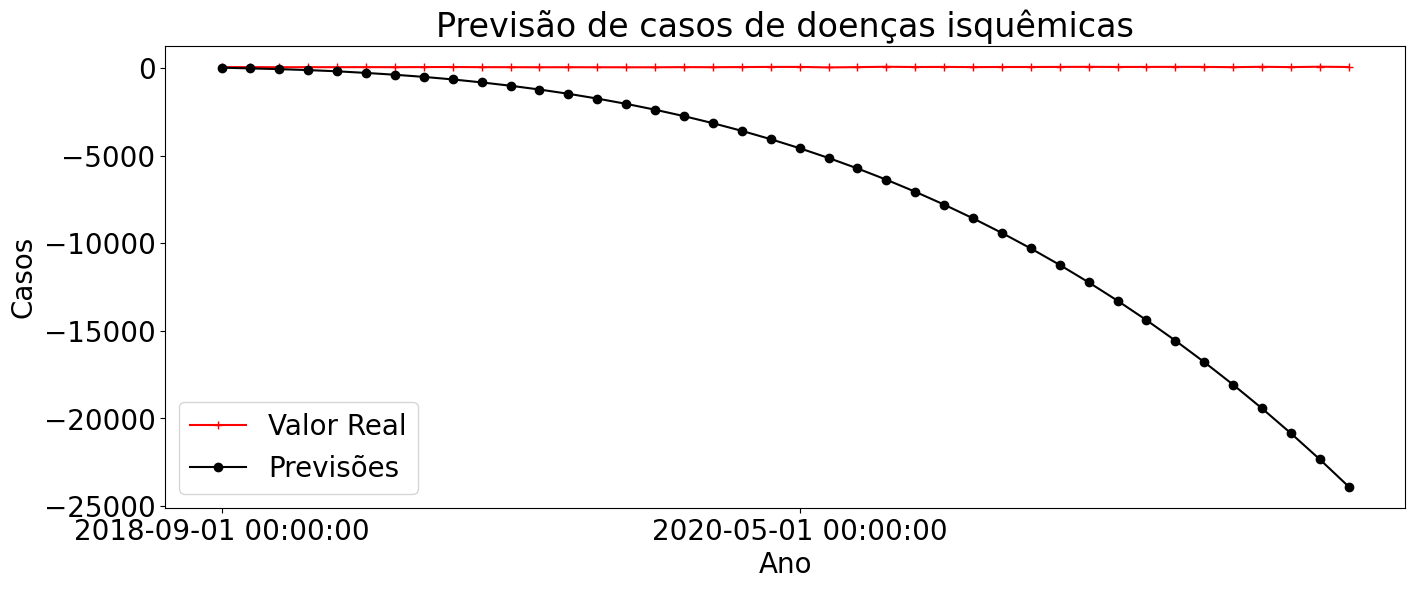

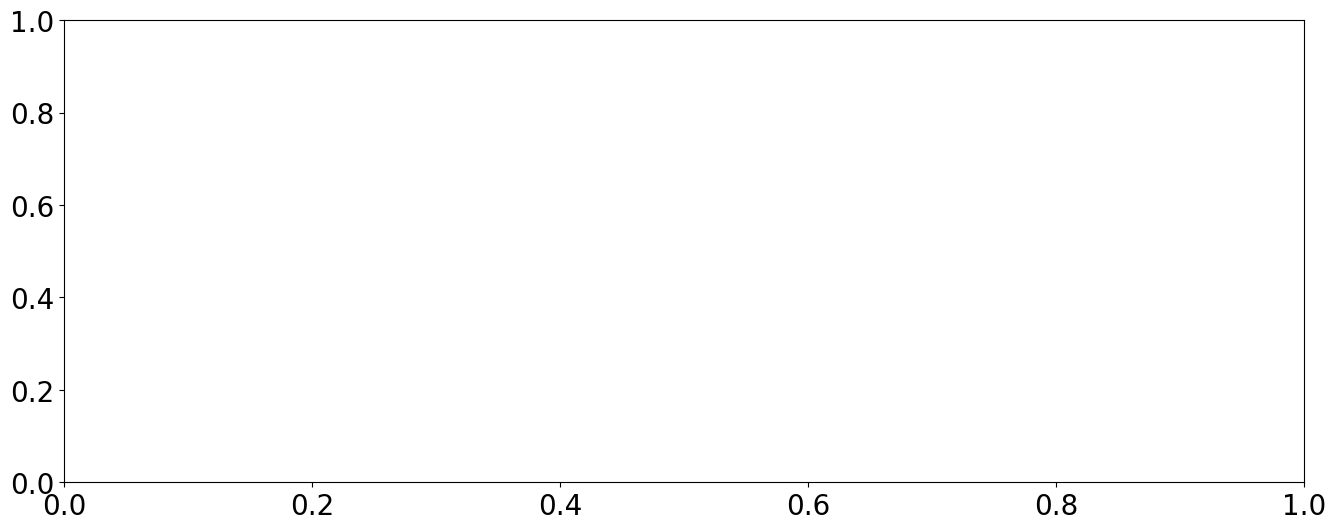

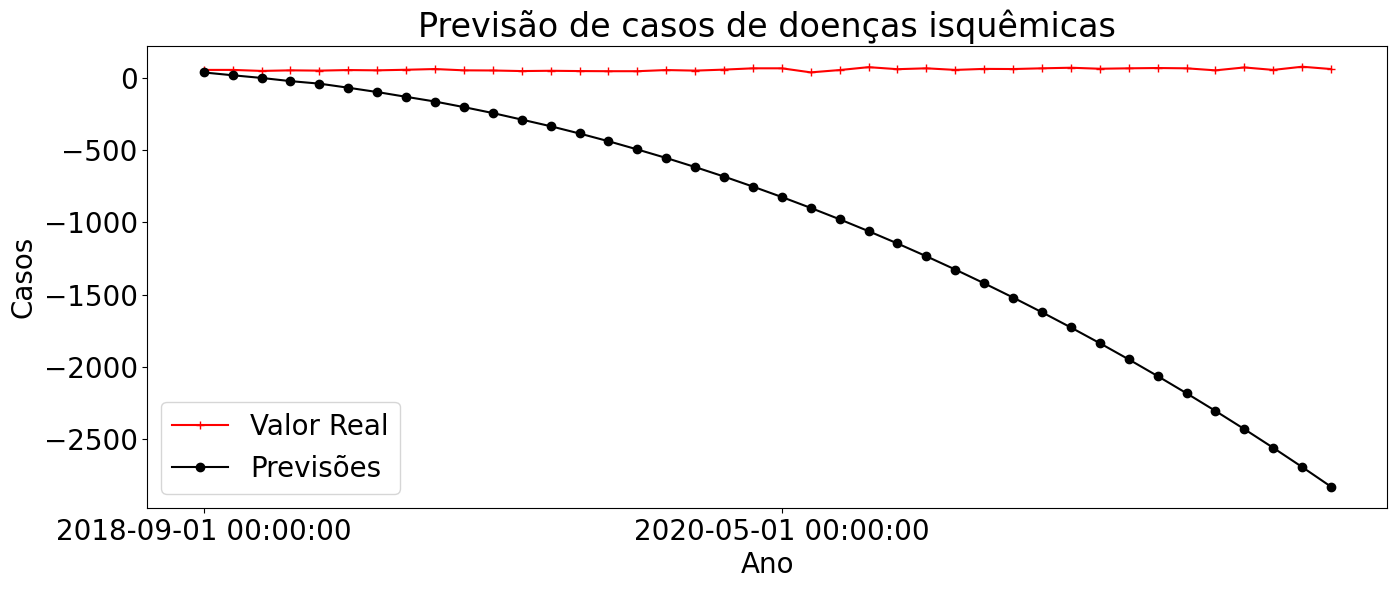

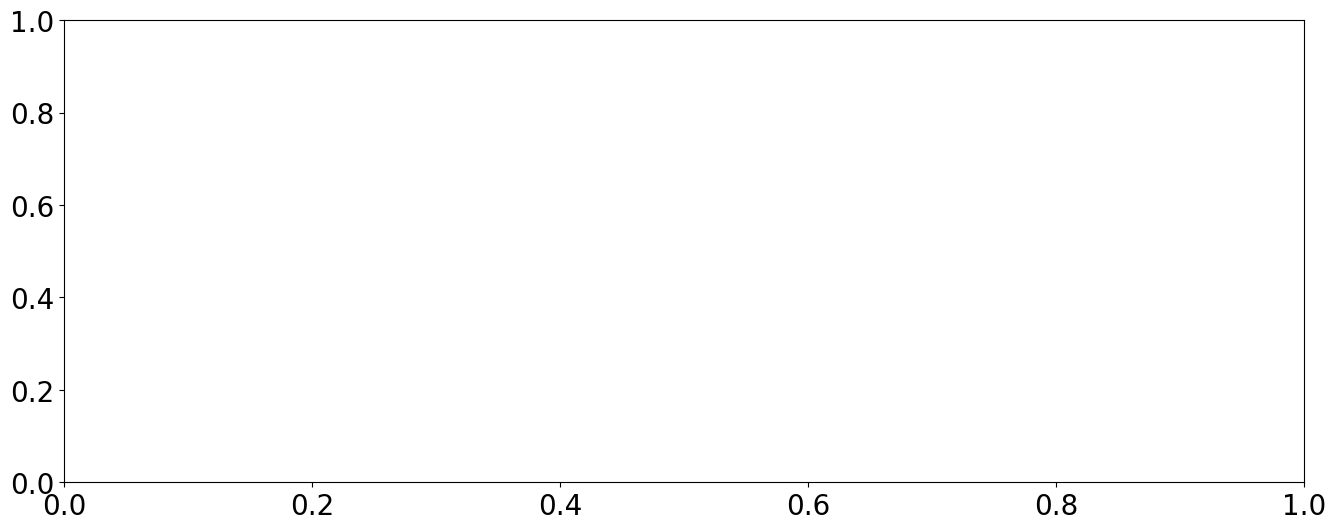

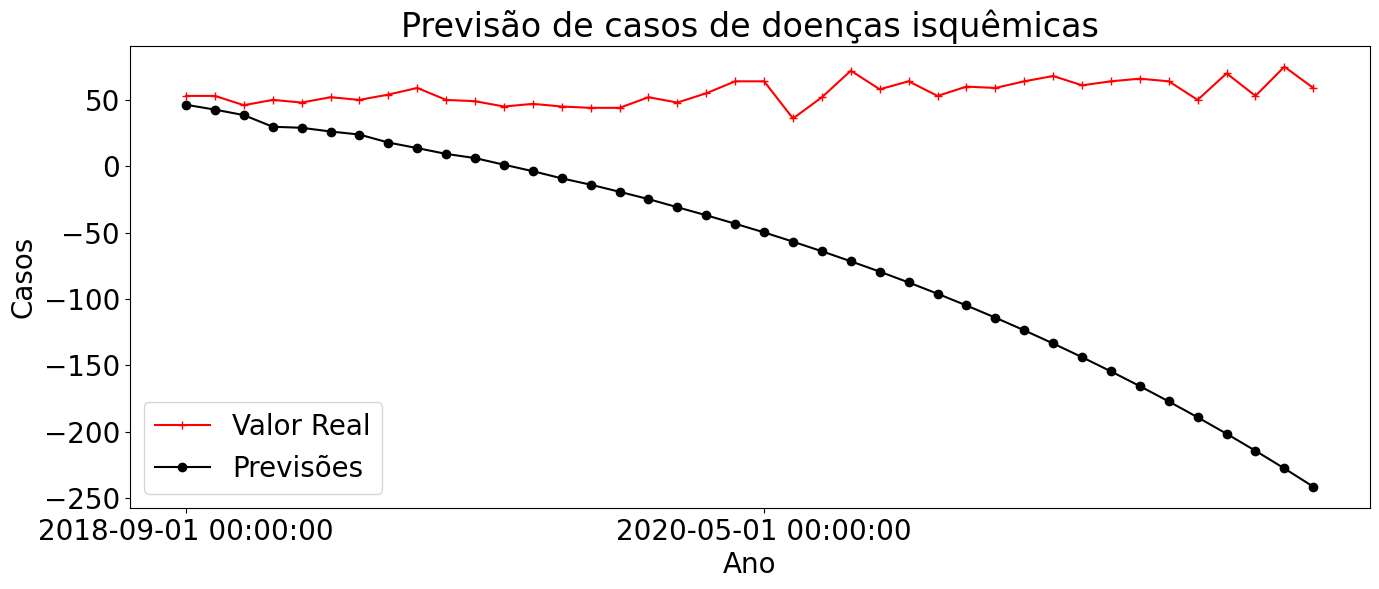

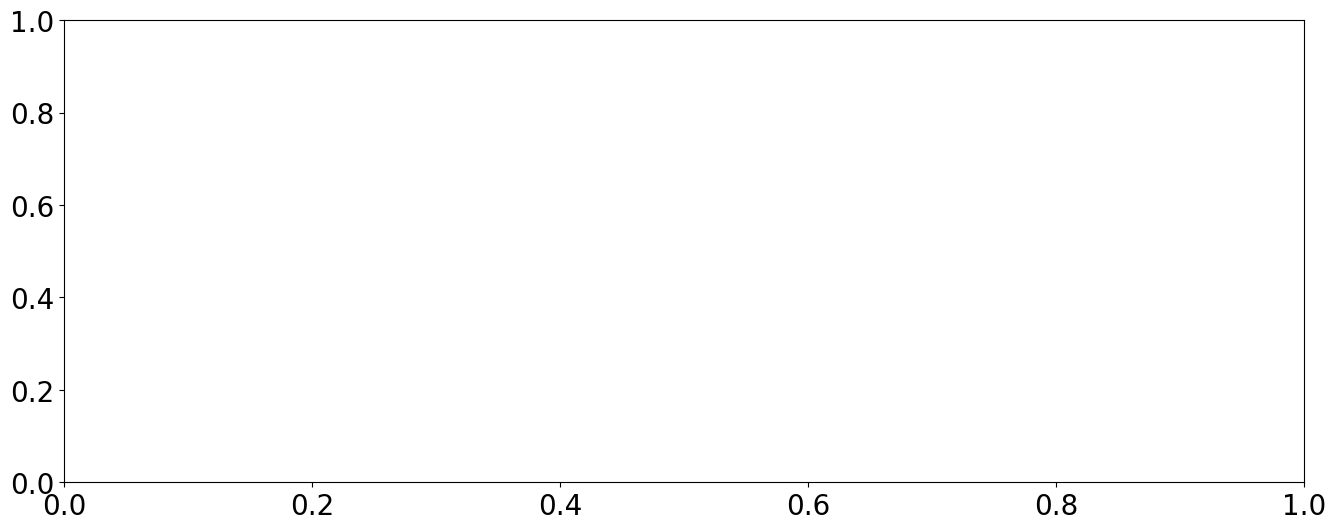

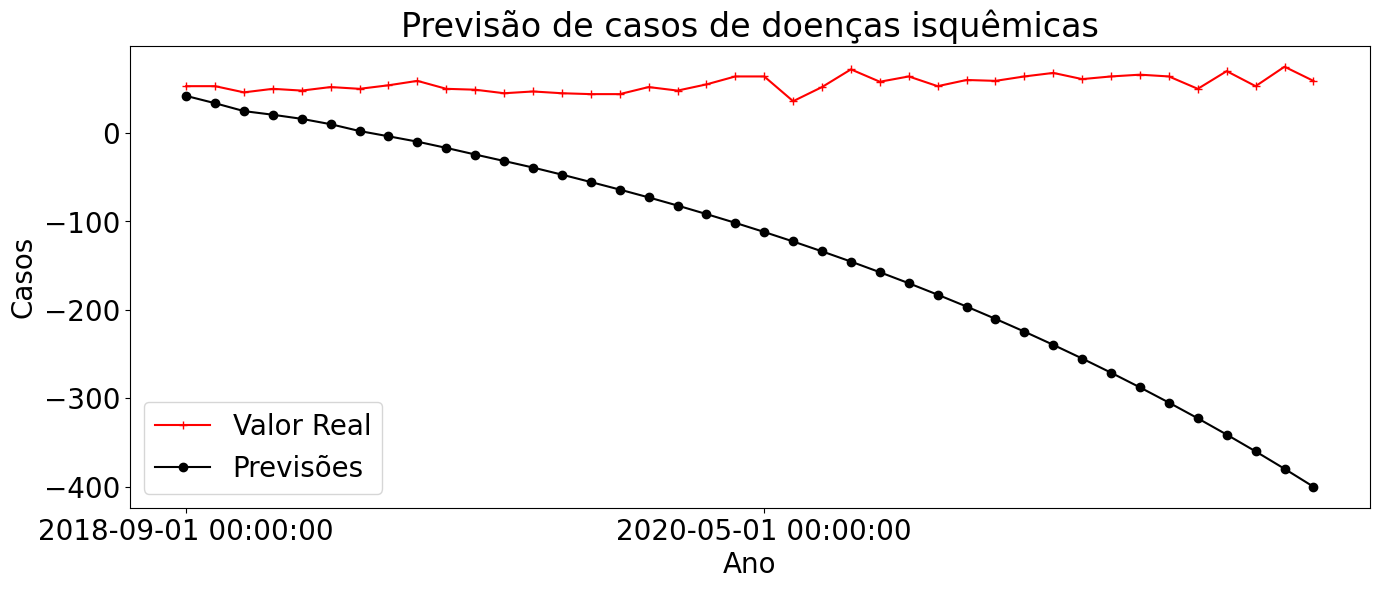

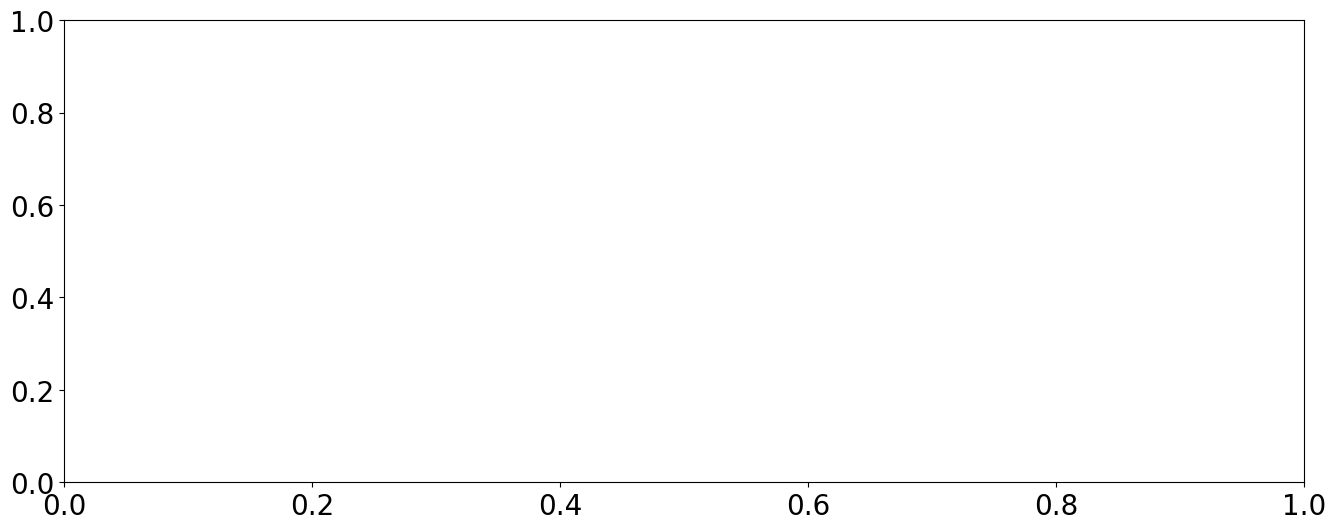

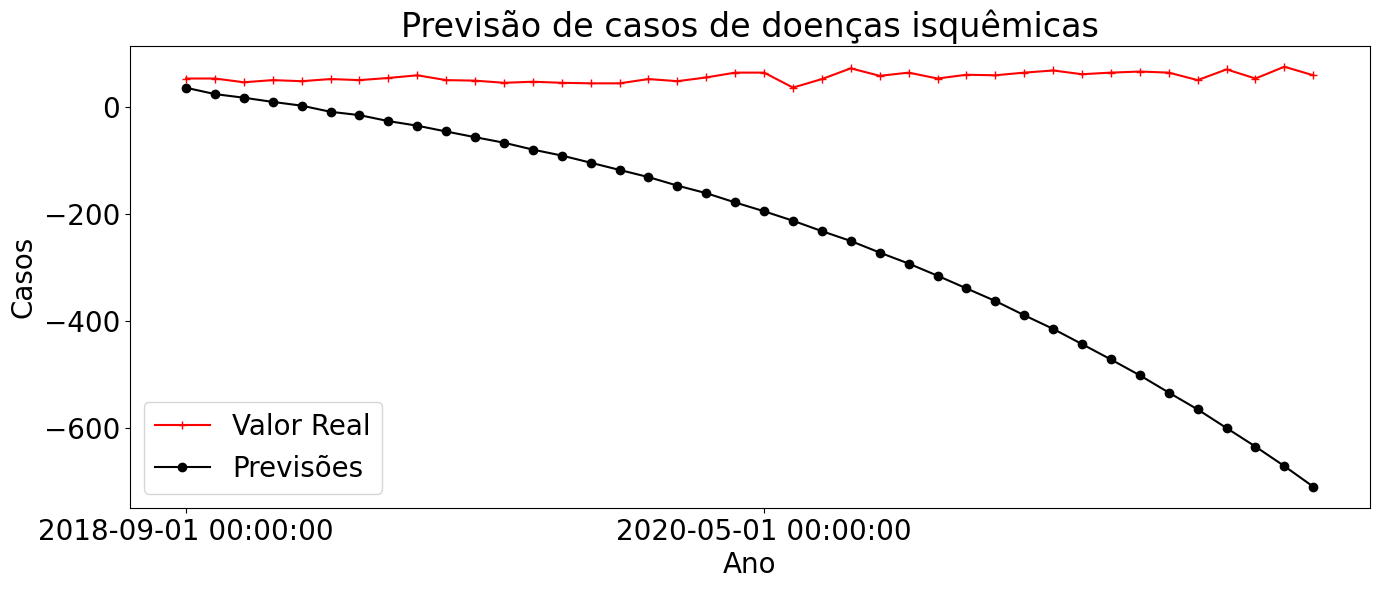

In [ ]:
for lags in range(5,6):
  for d in range(0,5):
    for q in range(0,5):
      previsores = []
      valor_real = [] # variavel que recebe o valor real de cada previsao que sera feita no treinamento

      p = lags # ALTERAR ISSO PARA EXPLICAR LAGS


      # cria uma base de dados com entradas (previsores) e tags (valor_real) para o treinar a rede.
      # for i in range(p, len(base_treinamento)):
      #   previsores.append(base_treinamento_normalizada[i - p:i])
      #   valor_real.append(base_treinamento_normalizada[i])


      # dados que foram para o treinamento
      data_train = base_treinamento.transpose().tolist()


      # dados para o teste
      data_test = base_completa[len(base_completa) - len(base_teste):]
      data_test = list(data_test)

      plt.rcParams.update({'font.size': 20})
      fig, ax = plt.subplots(nrows = 1, ncols =
                             1, figsize = [16, 6])
      #plt.plot(tts, data_test, color = 'red', label = 'Dados para teste', marker = "+")
      #plt.plot(ttr, data_train, color = 'blue', label = 'Dados para treinamento', marker = "o")

      #plt.xticks(range(0,df.shape[0],20), df['PERIODO'].loc[::20], rotation=0)
      # plt.title('Divisão das amostras')
      # plt.xlabel('Periodo')
      # plt.ylabel('Casos')
      # plt.legend()
      # plt.savefig(f'/content/drive/MyDrive/monografia/INFO_MODEL/divisao/ARIMA/divisao_amostras_AR{p}_arima.png', format = 'png', bbox_inches='tight')
      model = models.ARIMA(df['CASOS'], order=(p,d,q))
      #model =  sm.tsa.statespace.ARIMA(df['CASOS'], order=(p,d,q), seasonal_order=(1,1,1,12)) # cria o ARIMA
      model_fit = model.fit()

      previsores, valor_real = np.array(base_treinamento_normalizada), np.array(valor_real) # passa os valores para array somente
      previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1)) # prepara os valores

      previsoes = model_fit.predict(start=qtde_valores_modelo, end=(len(df)-1), dynamic=True)
      #previsoes = normalizador.inverse_transform(previsoes)
      previsoes_train = model_fit.predict(end= qtde_valores_modelo-1, dynamic=True)
      #previsoes_train = normalizador.inverse_transform(previsoes_train)

      ttr = list(range(len(base_treinamento)))
      tts = list(range(len(base_treinamento), len(base_completa)))
      tts1 = list(previsoes)

      # plotando
      plt.rcParams.update({'font.size': 20}) # configura a fonte do texto do grafico
      fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [16, 6]) # tamanho da figura
      plt.plot(tts, data_test, color = 'red', label = 'Valor Real', marker = "+") # plota os dados reais
      plt.plot(tts, previsoes, color = 'black', label = 'Previsões', marker = "o") # plota os dados preditos
      plt.title(f'Previsão de casos de doenças isquêmicas')
      plt.xticks(range(qtde_valores_modelo,df.shape[0],20), df.index[qtde_valores_modelo::20], rotation=0)
      plt.xlabel('Ano')
      plt.ylabel('Casos')
      plt.legend()
      plt.savefig((f'/content/drive/MyDrive/monografia/INFO_MODEL/IMG_ARIMA/prev_casos_AR{p}I{d}MA{q}.png'), format = 'png', bbox_inches='tight') # salva em uma figura

     # calcula as metricas
      #RMSE do conjunto de treinamento
      mse_t = mean_squared_error(base_treinamento, previsoes_train)
      rmse_t = np.sqrt(mse_t)
      #MAPE do conjunto de treinamento
      mape_t = mean_absolute_percentage_error(base_treinamento,previsoes_train)
      #RMSE do conjunto de testes
      mse_v = mean_squared_error(base_teste, previsoes)
      rmse_v = np.sqrt(mse_v)
      #MAPE do conjunto de
      mape_v = mean_absolute_percentage_error(base_teste, previsoes)
      rows = []
      rows.append([rmse_v, mape_v])
      pd.DataFrame(rows, columns=['RMSE', 'MAPE'])

      # salvando metricas no csv
      import csv

      filename = "/content/drive/MyDrive/monografia/INFO_MODEL/hiperp_metricas_ARIMA.csv"

      # Abre o arquivo csv em modo de leitura


          # Cria um novo conjunto de informações
      novas_informacoes = [p,d,q,rmse_t, mape_t,(rmse_v),(mape_v)]

          # Adiciona o novo conjunto de informações ao arquivo
      with open(filename, 'a', newline='') as f:
              # Cria um novo objeto `writer`
        writer = csv.writer(f)

              # Escreve o novo conjunto de informações no arquivo
        writer.writerow(novas_informacoes)


In [ ]:
rmse_v

26762408.153937794